# Cours 3 : « Phénomènes statistiques et applications »

Sommaire

1. La loi des grands nombres
2. Application à l'estimation : l'idée du bootstrap
3. Calcul d'intervalle de confiance par bootstrap
4. L'utilisation des intervalles de confiance
5. (optionnel) L'importance de la moyenne

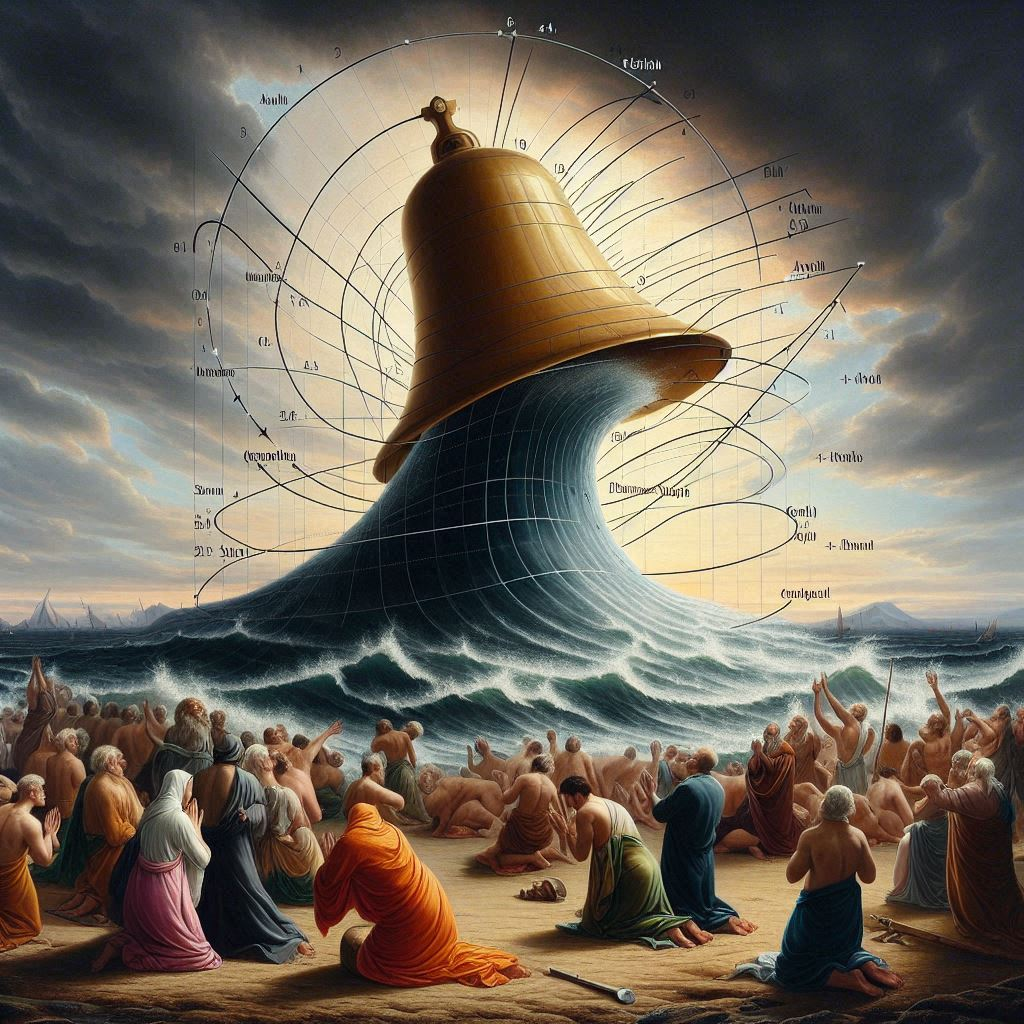

In [2]:
from IPython.display import Image
Image(filename='phénomènes_statistiques_et_applications.jpg', width=500)

## 1. La loi des moyennes

In [1]:
from datascience import *
%matplotlib inline
path_data = 'assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

Comme nous l'avons vu dans le dernier cours, si une expérience aléatoire est répétée indépendamment et dans des conditions identiques, alors, à long terme, la proportion de fois qu'un événement se produit se rapproche de plus en plus de la probabilité théorique de l'événement.

Par exemple, dans l'expérience du dé roulant que nous avons vue précédemment, à long terme, la proportion de fois où le visage avec quatre taches apparaît se rapproche de plus en plus de 1/6.

Ici, "indépendamment et dans des conditions identiques" signifie que chaque répétition est effectuée de la même manière, quels que soient les résultats de toutes les autres répétitions.

Dans ces conditions, la loi ci-dessus implique que si l'expérience aléatoire est répétée un grand nombre de fois, la proportion de fois qu'un événement se produit a de fortes chances d'être proche de la probabilité théorique de l'événement.

### Échantillonnage d'une population

Vérifions que la loi des moyennes s'applique également lorsque l'échantillon aléatoire est tiré parmi les individus d'une grande population.

Pour ce faire, revenons à l'exemple des retards de vols du dernier cours.

In [ ]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united

Un vol est parti avec 16 minutes d'avance et un autre avec 580 minutes de retard. Les autres retards se situent presque tous entre -10 minutes et 200 minutes, comme le montre l'histogramme ci-dessous.

In [ ]:
united.column('Delay').min()

In [ ]:
united.column('Delay').max()

In [ ]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

Pour les besoins de cette section, il suffit de zoomer sur l'essentiel des données et d'ignorer les 0,8 % de vols qui ont eu des retards de plus de 200 minutes. Cette restriction n'est qu'une commodité visuelle ; le tableau conserve toutes les données.

In [ ]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

In [ ]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')

La hauteur de la barre [0, 10] est d'un peu moins de 3% par minute, ce qui signifie qu'un peu moins de 30% des vols ont eu des retards entre 0 et 10 minutes. Ceci est confirmé par le comptage des lignes :

In [ ]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

### Convergence de la distribution empirique de l'échantillon

Considérons maintenant les 13 825 vols comme une population et tirons-en des échantillons aléatoires avec remplacement. Il est utile d'intégrer notre code dans une fonction. La fonction `empirical_hist_delay` prend la taille de l'échantillon comme argument et dessine un histogramme empirique des résultats.

In [ ]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

Comme nous l'avons vu avec les dés, lorsque la taille de l'échantillon augmente, l'histogramme empirique de l'échantillon ressemble de plus en plus à l'histogramme de la population. Comparez ces histogrammes à l'histogramme de la population ci-dessus.

In [ ]:
empirical_hist_delay(10)

In [ ]:
empirical_hist_delay(100)

Les divergences les plus visibles se situent au niveau des valeurs rares dans la population. Dans notre exemple, ces valeurs se trouvent dans la queue droite de la distribution. Mais à mesure que la taille de l'échantillon augmente, même ces valeurs commencent à apparaître dans l'échantillon dans des proportions à peu près correctes.

In [ ]:
empirical_hist_delay(1000)

### Convergence de la distribution empirique d'une statistique

#### Paramètres
Comme nous l'avons vu la dernière fois, nous sommes souvent intéressés par des quantités numériques associées à une population.
- Dans une population d'électeurs, quel pourcentage votera pour le candidat A ?
- Dans une population d'utilisateurs de Facebook, quel est le plus grand nombre d'amis Facebook que les utilisateurs ont ?
- Dans une population de vols United, quel est le retard médian au départ ?

Les quantités numériques associées à une population sont appelées *paramètres*. Pour la population des vols de `united`, nous connaissons la valeur du paramètre "délai médian" :

In [ ]:
np.median(united.column('Delay'))

#### Statistique
Dans de nombreuses situations, nous souhaitons déterminer la valeur d'un paramètre inconnu. Pour ce faire, nous nous appuierons sur les données d'un grand échantillon aléatoire tiré de la population.

Une *statistique* (notez le singulier !) est un nombre calculé à partir des données d'un échantillon. La médiane de l'échantillon est donc une statistique.

Pour vérifier empiriquement si la loi des moyennes s'applique à la distribution d'une statistique, simulons les valeurs que la médiane de l'échantillon prendrait pour des échantillons aléatoires de différentes tailles de la population des vols de `united`.

Créons une fonction pour générer un échantillon aléatoire de taille `sample_size`.

In [1]:
def random_sample_median(sample_size):
    return np.median(united.sample(sample_size).column('Delay'))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


À l'aide de cette fonction, nous simulons 5000 expériences chacune, pour des échantillons aléatoires de taille 10, 100 et 1000, où dans chaque expérience un échantillon aléatoire de la taille souhaitée est tiré et la médiane est calculée.

In [ ]:
medians_10 = make_array()

for i in np.arange(5000):
    medians_10 = np.append(medians_10, random_sample_median(10))

medians_100 = make_array()

for i in np.arange(5000):
    medians_100 = np.append(medians_100, random_sample_median(100))

medians_1000 = make_array()

for i in np.arange(5000):
    medians_1000 = np.append(medians_1000, random_sample_median(1000))

La simulation est effectuée. 5 000 médianes d'échantillons simulés pour des échantillons de taille 10 ont été collectées dans le tableau `medians_10`, 5000 médianes d'échantillons simulés pour des échantillons de taille 100 ont été collectées dans le tableau `medians_100` et 5000 médianes d'échantillons simulés pour des échantillons de taille 1000 ont été collectées dans le tableau `medians_1000`. Il est maintenant temps de visualiser les résultats.

#### Visualisation

Nous créons un tableau pour stocker les résultats et les visualiser avec seaborn.

In [ ]:
df_10 = pandas.Dataframe({'Sample Median' : median_10})
df_10['Sample size'] = 10

df_100 = pandas.Dataframe({'Sample Median' : median_100})
df_100['Sample size'] = 100

df_1000 = pandas.Dataframe({'Sample Median' : median_1000})
df_1000['Sample size'] = 1000

simulated_medians = pandas.concat([df_10, df_100, df_1000])

Nous pouvons visualiser les données simulées à l'aide d'un histogramme. L'histogramme est appelé *histogramme empirique de la statistique*. Il affiche la *distribution empirique* de la statistique. N'oubliez pas que *empirique* signifie *observé*.

In [4]:
seaborn.displot(data=simulated_medians, x="Sample Median", row="Sample size")

NameError: name 'seaborn' is not defined

On constate qu'à mesure que la taille de l'échantillon augmente, la distribution de la médiane de l'échantillon se concentre de plus en plus autour de 2, qui était la valeur de la médiane de la population.

Cela illustre la validité de la loi des moyennes pour la distribution d'une statistique, qui explique pourquoi une statistique peut fournir une bonne estimation d'un paramètre, à condition qu'elle soit calculée sur un échantillon suffisamment grand.

### Résumé

Ce que nous avons observé dans cette section peut être résumé comme suit :

Pour un grand échantillon aléatoire, l'histogramme empirique de l'échantillon ressemble à l'histogramme de la population, avec une forte probabilité.

Cela justifie l'utilisation de grands échantillons aléatoires dans l'inférence statistique. L'idée est que, puisqu'un grand échantillon aléatoire est susceptible de ressembler à la population dont il est tiré, les quantités calculées à partir des valeurs de l'échantillon sont susceptibles d'être proches des quantités correspondantes dans la population.

## 2. Application à l'estimation : l'idée du bootstrap

Dans le chapitre précédent, nous avons commencé à développer des modes de pensée déductive. En particulier, nous avons appris à utiliser des données pour choisir entre deux hypothèses sur le monde. Mais souvent, nous voulons simplement savoir quelle est la taille d'une chose.

Par exemple, dans un chapitre précédent, nous avons cherché à savoir combien d'avions de guerre l'ennemi pouvait avoir. Au cours d'une année électorale, nous pourrions vouloir connaître le pourcentage d'électeurs favorables à un candidat donné. Pour évaluer l'économie actuelle, nous pourrions nous intéresser au revenu annuel médian des ménages aux États-Unis.

Dans ce chapitre, nous allons développer une méthode pour *estimer* un *paramètre* inconnu. Rappelons qu'un paramètre est une valeur numérique associée à une population.  

Pour déterminer la valeur d'un paramètre, nous avons besoin de données. Si nous disposons des données pertinentes pour l'ensemble de la population, nous pouvons simplement calculer le paramètre.

Mais si la population est très vaste - par exemple, s'il s'agit de tous les ménages des États-Unis - il peut être trop coûteux et trop long de recueillir des données auprès de l'ensemble de la population. Dans de telles situations, les scientifiques des données s'appuient sur un échantillonnage aléatoire de la population.

Cela conduit à une question d'inférence : Comment tirer des conclusions justifiables sur le paramètre inconnu, sur la base des données de l'échantillon aléatoire ? Nous répondrons à cette question en utilisant la pensée déductive.

Une statistique basée sur un échantillon aléatoire peut constituer une estimation raisonnable d'un paramètre inconnu dans la population. Par exemple, vous pourriez vouloir utiliser le revenu annuel médian des ménages échantillonnés comme estimation du revenu annuel médian de tous les ménages aux États-Unis.

Mais la valeur de toute statistique dépend de l'échantillon, et l'échantillon est basé sur des tirages aléatoires. Ainsi, chaque fois que les scientifiques des données proposent une estimation basée sur un échantillon aléatoire, ils sont confrontés à une question :

**"Dans quelle mesure cette estimation aurait-elle pu être différente si l'échantillon avait été tiré différemment ? "**.

Dans ce chapitre, vous apprendrez une façon de répondre à cette question. La réponse vous donnera les outils nécessaires pour estimer un paramètre numérique et quantifier le degré d'erreur de votre estimation.

Nous commencerons par une présentation préliminaire des percentiles. Le percentile le plus connu est la médiane, souvent utilisée dans les résumés de données sur les revenus. D'autres percentiles seront importants dans la méthode d'estimation que nous allons développer. Nous commencerons donc par définir soigneusement les percentiles.

### Percentiles
Les données numériques peuvent être triées par ordre croissant ou décroissant. Les valeurs d'un ensemble de données numériques ont donc un *rang*. Un percentile est la valeur à un rang particulier.

Par exemple, si votre résultat à un test se situe au 95e percentile, une interprétation courante est que seuls 5 % des résultats sont supérieurs au vôtre. La médiane est le 50e percentile ; on suppose généralement que 50 % des valeurs d'un ensemble de données sont supérieures à la médiane.

Mais il faut faire preuve de prudence pour donner aux percentiles une définition précise qui s'applique à tous les rangs et à toutes les listes. Pour comprendre pourquoi, prenons un exemple extrême où tous les élèves d'une classe obtiennent 75 à un test. Dans ce cas, 75 est un candidat naturel pour la médiane, mais il n'est pas vrai que 50 % des notes sont supérieures à 75. De même, 75 est un candidat tout aussi naturel pour le 95e percentile, le 25e percentile ou tout autre percentile. Les égalités - c'est-à-dire les valeurs de données égales - doivent être prises en compte lors de la définition des percentiles.

Il faut également faire attention à la longueur de la liste lorsque l'indice pertinent n'est pas clair. Par exemple, quel devrait être le 87e centile d'une collection de 10 valeurs ? La 8e valeur de la collection triée, ou la 9e, ou quelque chose entre les deux ?

Dans cette section, nous donnerons une définition qui fonctionne de manière cohérente pour tous les rangs et toutes les listes.

#### Un exemple numérique
Avant de donner une définition générale de tous les percentiles, nous définirons le 80e percentile d'une collection de valeurs comme étant la plus petite valeur de la collection qui est au moins aussi grande que 80 % de toutes les valeurs.

Par exemple, considérons les tailles des cinq plus grands continents - l'Afrique, l'Antarctique, l'Asie, l'Amérique du Nord et l'Amérique du Sud - arrondies au million de miles carrés le plus proche.

In [2]:
sizes = make_array(12, 17, 6, 9, 7)

Le 80e centile est la plus petite valeur qui est au moins aussi grande que 80 % des éléments de `sizes`, c'est-à-dire quatre cinquièmes des cinq éléments. Cela fait 12 :

In [3]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

Le 80e centile est une valeur de la liste, à savoir 12. Vous pouvez constater que 80 % des valeurs lui sont inférieures ou égales et qu'il s'agit de la plus petite valeur de la liste pour laquelle cela est vrai.

De même, le 70e centile est la plus petite valeur de la collection qui est au moins aussi grande que 70 % des éléments de `sizes`. Or 70% de 5 éléments est "3,5 éléments", donc le 70ème percentile est le 4ème élément de la liste. C'est 12, le même que le 80ème percentile pour ces données.

#### Fonction `percentile
La fonction `percentile` prend deux arguments : un rang entre 0 et 100, et un tableau. Elle renvoie le centile correspondant du tableau.

In [4]:
percentile(70, sizes)

12

#### La définition générale

Soit $p$ un nombre compris entre 0 et 100. Le $p$ème centile d'une collection est la plus petite valeur de la collection qui est au moins aussi grande que p% de toutes les valeurs.

D'après cette définition, tout centile compris entre 0 et 100 peut être calculé pour n'importe quelle collection de valeurs, et il s'agit toujours d'un élément de la collection.

En pratique, supposons que la collection comporte $n$ éléments. Pour trouver le $p$ème centile :
- Triez la collection par ordre croissant.
- Trouver p% de n : $(p/100) fois n$. Appelons cela $k$.
- Si $k$ est un entier, prenez le $k$ème élément de la collection triée.
- Si $k$ n'est pas un entier, arrondissez-le à l'entier supérieur et prenez cet élément de la collection triée.

#### Exemple
La table `scores_and_sections` contient une ligne pour chaque étudiant d'une classe de 359 étudiants. Les colonnes sont la section de discussion et la note de mi-parcours de l'étudiant.

In [5]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


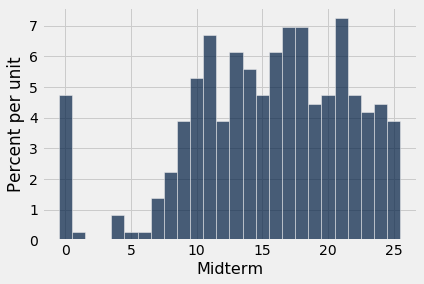

In [6]:
scores_and_sections.select('Midterm').hist(bins=np.arange(-0.5, 25.6, 1))

Quel était le 85e percentile des notes ? Pour utiliser la fonction `percentile`, créez un tableau `scores` contenant les notes des partiels, et trouvez le 85ème percentile :

In [7]:
scores = scores_and_sections.column(1)

In [8]:
percentile(85, scores)

22

D'après la fonction percentile, le 85ème percentile est 22. Pour vérifier que cela est cohérent avec notre nouvelle définition, appliquons directement la définition.

Tout d'abord, classons les scores par ordre croissant :

In [9]:
sorted_scores = np.sort(scores_and_sections.column(1))

Il y a 359 résultats dans le tableau. Il faut donc trouver 85% de 359, soit 305,15.

In [10]:
0.85 * 359

305.15

Ce n'est pas un entier. Selon notre définition, le 85ème percentile est le 306ème élément de `sorted_scores`, qui, selon la convention d'indexation de Python, est l'élément 305 du tableau.

In [11]:
# The 306th element of the sorted array

sorted_scores.item(305)

22

C'est la même réponse que celle que nous avons obtenue en utilisant `percentile`. À l'avenir, nous utiliserons uniquement `percentile`.

#### Quartiles
Le *premier quartile* d'une collection numérique est le 25e percentile. La terminologie provient du *premier quartile*. Le deuxième quartile est la médiane et le troisième quartile est le 75e percentile.

Pour nos données `scores`, ces valeurs sont :

In [12]:
percentile(25, scores)

11

In [13]:
percentile(50, scores)

16

In [14]:
percentile(75, scores)

20

Les distributions des scores sont parfois résumées par l'intervalle des "50% du milieu", entre le premier et le troisième quartile.

### Le Bootstrap
Un spécialiste des données utilise les données d'un échantillon aléatoire pour estimer un paramètre inconnu. Elle utilise l'échantillon pour calculer la valeur d'une statistique qu'elle utilisera comme estimation.

Une fois qu'elle a calculé la valeur observée de sa statistique, elle pourrait simplement la présenter comme son estimation et poursuivre son chemin. Mais c'est une scientifique des données. Elle sait que son échantillon aléatoire n'est qu'un des nombreux échantillons aléatoires possibles, et que son estimation n'est donc qu'une des nombreuses estimations plausibles.

De combien ces estimations peuvent-elles varier ? Pour répondre à cette question, il semble qu'elle doive tirer un autre échantillon de la population et calculer une nouvelle estimation sur la base du nouvel échantillon. Mais elle n'a pas les moyens de retourner dans la population et de tirer un autre échantillon.

Il semble que le scientifique des données soit bloqué.

Heureusement, une idée brillante appelée *le bootstrap* peut l'aider. Comme il n'est pas possible de générer de nouveaux échantillons à partir de la population, le bootstrap génère de nouveaux échantillons aléatoires par une méthode appelée *rééchantillonnage* : les nouveaux échantillons sont tirés au hasard *à partir de l'échantillon original*.

Dans cette section, nous verrons comment et pourquoi le bootstrap fonctionne. Dans le reste du chapitre, nous utiliserons le bootstrap pour l'inférence.



#### Rémunération des employés de la ville de San Francisco
[SF OpenData] (https://data.sfgov.org) est un site web sur lequel la ville et le comté de San Francisco mettent certaines de leurs données à la disposition du public. L'un des ensembles de données contient des données sur la rémunération des employés de la ville. Il s'agit notamment des professionnels de la santé dans les hôpitaux gérés par la ville, des policiers, des pompiers, des employés des transports, des élus et de tous les autres employés de la ville.

Les données de rémunération pour l'année civile 2019 se trouvent dans la table `sf2019`.

In [2]:
sf2019 = Table.read_table(path_data + 'san_francisco_2019.csv')

In [3]:
sf2019.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


Il y a une ligne pour chacun des 44 500 employés. De nombreuses colonnes contiennent des informations sur l'appartenance au département de la ville et des détails sur les différentes composantes de la rémunération de l'employé. Voici la ligne correspondant à London Breed, maire de San Francisco en 2019.

In [4]:
sf2019.where('Job', 'Mayor')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Mayor,Administrative & Mgmt (Unrep),Mayor,342974,0,98012,440987


Nous allons étudier la dernière colonne, "Rémunération totale". Il s'agit du salaire de l'employé plus la contribution de la ville à ses régimes de retraite et d'avantages sociaux.

Il est parfois difficile de comprendre les enveloppes financières au cours d'une année civile, car elles dépendent de la date d'embauche, du fait que l'employé change ou non d'emploi au sein de la ville, etc. Par exemple, les valeurs les plus basses de la colonne "Rémunération totale" sont un peu étranges.

In [5]:
sf2019.sort('Total Compensation')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


Pour la clarté de l'interprétation, nous concentrerons notre attention sur les personnes qui ont eu à peu près l'équivalent d'un emploi à mi-temps ou plus pendant toute l'année. Avec un salaire minimum d'environ 15 dollars de l'heure, et 20 heures par semaine pendant 52 semaines, cela représente un salaire de plus de 15 000 dollars.

In [6]:
sf2019 = sf2019.where('Salary', are.above(15000))

In [7]:
sf2019.num_rows

37103

#### Population et paramètres
Considérons ce tableau d'un peu plus de 37 000 lignes comme notre population. Voici un histogramme des rémunérations totales des salariés de ce tableau.

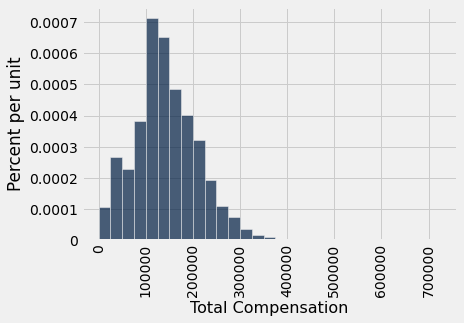

In [8]:
sf_bins = np.arange(0, 726000, 25000)
sf2019.select('Total Compensation').hist(bins=sf_bins)

Si la plupart des valeurs sont inférieures à 300 000 dollars, quelques-unes sont beaucoup plus élevées. Par exemple, la rémunération totale du directeur des investissements s'élève à plus de 700 000 dollars. C'est pourquoi l'axe horizontal s'étend assez loin à droite des barres visibles.

In [9]:
sf2019.sort('Total Compensation', descending=True).show(2)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951


Supposons que le paramètre qui nous intéresse soit la médiane des compensations totales.

Comme nous avons le luxe de disposer de toutes les données de la population, nous pouvons simplement calculer le paramètre :

In [10]:
pop_median = percentile(50, sf2019.column('Total Compensation'))
pop_median

135747.0

La rémunération totale médiane de l'ensemble des salariés était de 135 747 dollars.

D'un point de vue pratique, nous n'avons aucune raison de tirer un échantillon pour estimer ce paramètre puisque nous connaissons simplement sa valeur. Mais dans cette section, nous allons faire comme si nous ne connaissions pas cette valeur et voir dans quelle mesure nous pouvons l'estimer à partir d'un échantillon aléatoire.

Dans les sections suivantes, nous redescendrons sur terre et travaillerons dans des situations où le paramètre est inconnu. Pour l'instant, nous sommes omniscients.

#### Un échantillon aléatoire et une estimation
Tirons au hasard un échantillon de 500 salariés sans remplacement et considérons la rémunération totale médiane des salariés de l'échantillon comme notre estimation du paramètre.

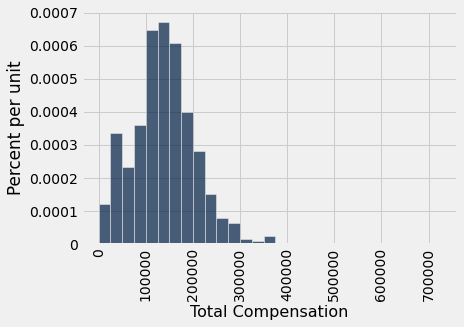

In [13]:
our_sample = sf2019.sample(500, with_replacement=False)
our_sample.select('Total Compensation').hist(bins=sf_bins)

In [14]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

136835.0

La taille de l'échantillon est importante. Par la loi des moyennes, la distribution de l'échantillon ressemble à celle de la population. Par conséquent, la médiane de l'échantillon est tout à fait comparable à la médiane de la population, même si elle n'est pas exactement la même.

Nous disposons donc maintenant d'une estimation du paramètre. Mais si les résultats de l'échantillon avaient été différents, l'estimation aurait eu une valeur différente. Nous aimerions pouvoir quantifier l'ampleur de la variation de l'estimation d'un échantillon à l'autre. Cette mesure de la variabilité nous aidera à évaluer la précision avec laquelle nous pouvons estimer le paramètre.

Pour voir à quel point l'estimation serait différente si l'échantillon avait donné des résultats différents, nous pourrions simplement tirer un autre échantillon de la population. Mais ce serait de la triche. Nous essayons d'imiter la vie réelle, dans laquelle nous n'aurons pas toutes les données de la population à portée de main.

D'une manière ou d'une autre, nous devons obtenir un autre échantillon aléatoire *sans échantillonner à nouveau la population*.

#### Le Bootstrap : Le rééchantillonnage à partir de l'échantillon

Nous disposons d'un grand échantillon aléatoire de la population. Comme nous le savons, un grand échantillon aléatoire est susceptible de ressembler à la population dont il est tiré. Cette observation permet aux scientifiques des données de "s'élever par leurs propres bottes" : la procédure d'échantillonnage peut être reproduite en "rééchantillonnant à partir de l'échantillon".

Voici les étapes de *la méthode bootstrap* pour générer un autre échantillon aléatoire qui ressemble à la population :

- **Traiter l'échantillon original comme s'il s'agissait de la population.**
- Prélever dans l'échantillon, au hasard et avec remplacement, le même nombre de fois que la taille de l'échantillon original**.

Il est important de rééchantillonner le même nombre de fois que la taille de l'échantillon original. En effet, la variabilité d'une estimation dépend de la taille de l'échantillon. Étant donné que notre échantillon initial comprenait 500 employés, la médiane de notre échantillon était basée sur 500 valeurs. Pour voir dans quelle mesure l'échantillon aurait pu être différent, nous devons le comparer à la médiane d'autres échantillons de taille 500.

Si nous tirions 500 fois au hasard *sans* remplacement dans notre échantillon de taille 500, nous obtiendrions le même échantillon. En tirant *avec* remplacement, nous créons la possibilité que les nouveaux échantillons soient différents de l'original, parce que certains employés peuvent être tirés plus d'une fois et d'autres pas du tout.

#### Pourquoi le Bootstrap fonctionne

Pourquoi est-ce une bonne idée ? En vertu de la loi des moyennes, la distribution de l'échantillon original est susceptible de ressembler à la population, et les distributions de tous les "rééchantillons" sont susceptibles de ressembler à l'échantillon original. Les distributions de tous les nouveaux échantillons sont donc susceptibles de ressembler également à la population.

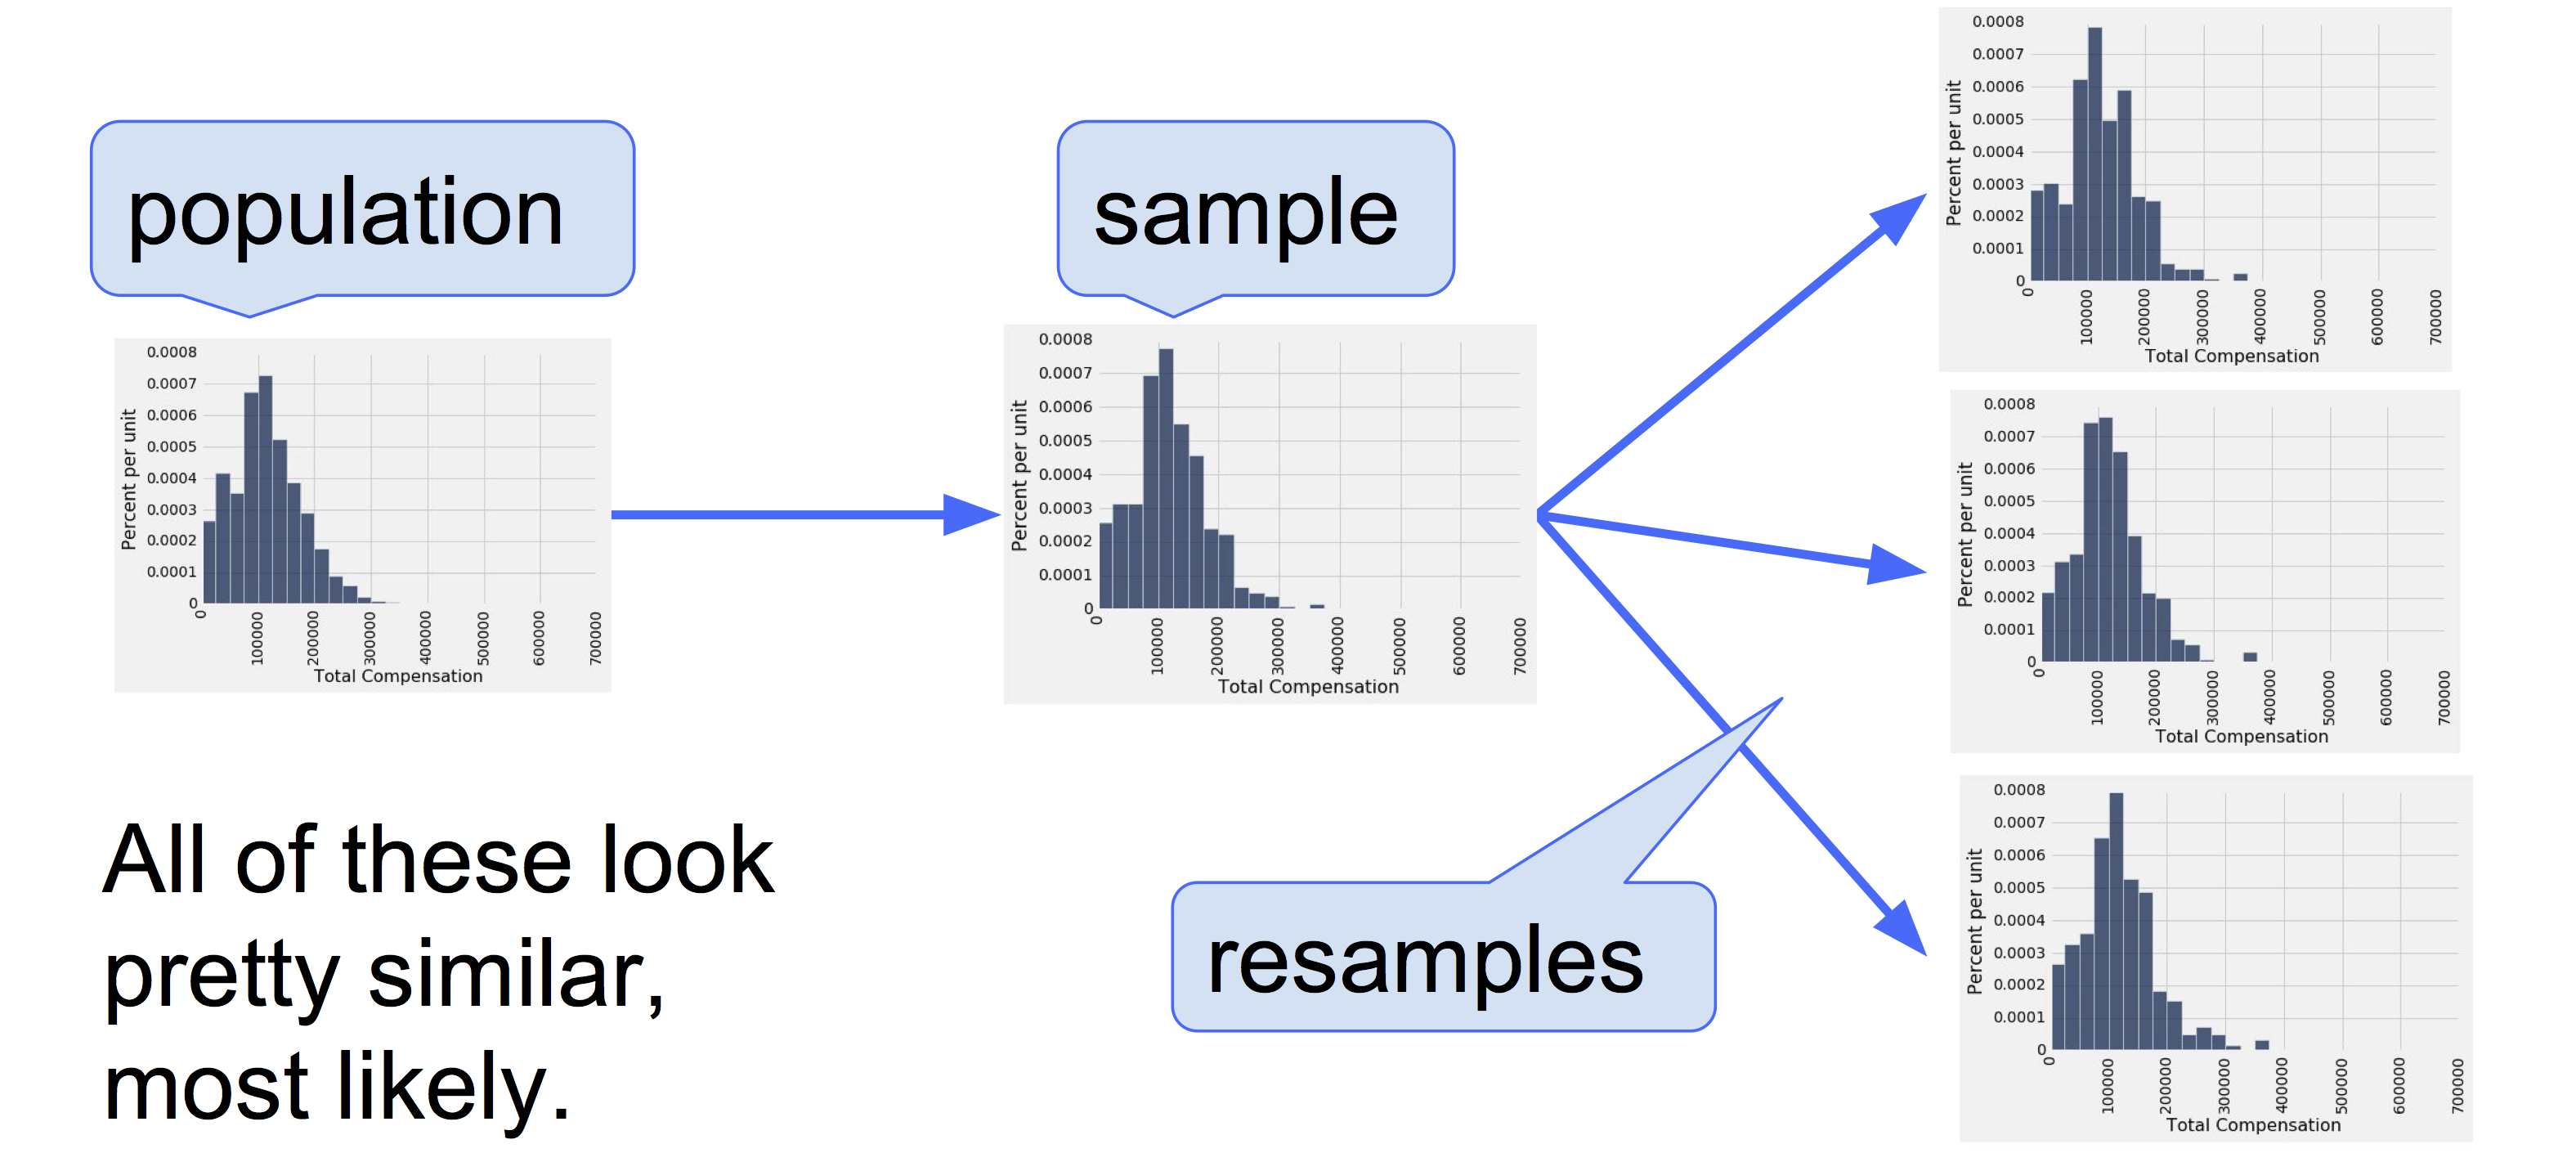

In [4]:
from IPython.display import Image
Image("images/bootstrap_pic.png")

#### Une médiane rééchantillonnée
Rappelons que la méthode `sample` tire des lignes d'un tableau avec remplacement par défaut, et quand elle est utilisée sans spécifier de taille d'échantillon, la taille de l'échantillon est par défaut égale au nombre de lignes du tableau. C'est parfait pour le bootstrap ! Voici un nouvel échantillon tiré de l'échantillon original, et la médiane de l'échantillon correspondant.

In [15]:
resample_1 = our_sample.sample()

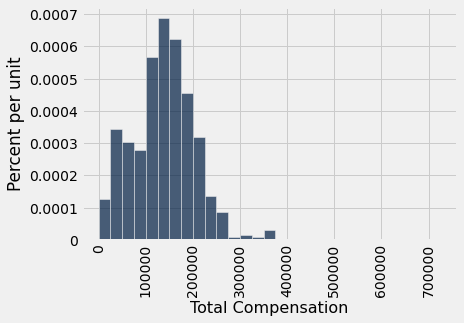

In [16]:
resample_1.select('Total Compensation').hist(bins=sf_bins)

In [17]:
resampled_median_1 = percentile(50, resample_1.column('Total Compensation'))
resampled_median_1

141793.0

Cette valeur est une estimation de la médiane de la population.

En procédant à des rééchantillonnages répétés, nous pouvons obtenir un grand nombre d'estimations de ce type, et donc une distribution empirique des estimations.

In [18]:
resample_2 = our_sample.sample()
resampled_median_2 = percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

135880.0

Rassemblons ce code et définissons une fonction `one_bootstrap_median` qui renvoie une médiane bootstrap de la rémunération totale, basée sur le bootstrap de l'échantillon aléatoire original que nous avons appelé `notre_échantillon`.

In [19]:
def one_bootstrap_median():
    resampled_table = our_sample.sample()
    bootstrapped_median = percentile(50, resampled_table.column('Total Compensation'))
    return bootstrapped_median

Exécutez la cellule ci-dessous plusieurs fois pour voir comment les médianes bootstrappées varient. Rappelez-vous que chacune d'entre elles est une estimation de la médiane de la population.

In [20]:
one_bootstrap_median()

132175.0

#### Distribution empirique bootstrap de la médiane de l'échantillon

Nous pouvons maintenant répéter le processus de bootstrap plusieurs fois en exécutant une boucle `for` comme d'habitude. A chaque itération, nous appellerons la fonction `one_bootstrap_median` pour générer une valeur de la médiane bootstrap basée sur notre échantillon original `notre_échantillon`. Ensuite, nous ajouterons la médiane bootstrappée au tableau de collection `bstrap_medians`.

Comme nous demandons 5000 répétitions, le code peut prendre un certain temps à s'exécuter. Il y a beaucoup de rééchantillonnage à faire !

In [21]:
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append (bstrap_medians, one_bootstrap_median())

Voici un histogramme empirique des 5000 médianes bootstrapées. Le point vert est le paramètre de population : il s'agit de la médiane de l'ensemble de la population, ce que nous essayons d'estimer. Dans cet exemple, nous connaissons sa valeur, mais nous ne l'avons pas utilisée dans le processus de bootstrap.

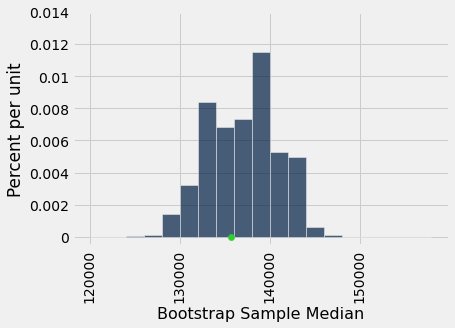

In [22]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)
median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

Il est important de rappeler que le point vert est fixe : il correspond à 135 747 dollars, la médiane de la population. L'histogramme empirique est le résultat de tirages aléatoires et sera situé de manière aléatoire par rapport au point vert.

Rappelez-vous également que le but de tous ces calculs est d'estimer la médiane de la population, qui est le point vert. Nos estimations sont toutes les médianes échantillonnées générées aléatoirement dont vous voyez l'histogramme ci-dessus. Nous voulons que l'ensemble de ces estimations contienne le paramètre. Si ce n'est pas le cas, les estimations sont erronées.

#### Les estimations capturent-elles le paramètre ?

Combien de fois l'histogramme empirique des médianes rééchantillonnées se situe-t-il fermement au-dessus du point vert, et ne se contente-t-il pas d'effleurer le point avec ses queues ou ne le couvre-t-il pas du tout ? Pour répondre à cette question, nous devons définir ce qu'est une "assise solide". Considérons que cela signifie que "les 95 % de médianes rééchantillonnées contiennent le point vert".

Voici les deux extrémités de l'intervalle "95% du milieu" des médianes rééchantillonnées :

In [23]:
left = percentile(2.5, bstrap_medians)
left

129524.0

In [24]:
right = percentile(97.5, bstrap_medians)
right

143446.0

La médiane de la population de 135 747 dollars se situe entre ces deux nombres. L'intervalle et la médiane de la population sont représentés sur l'histogramme ci-dessous.

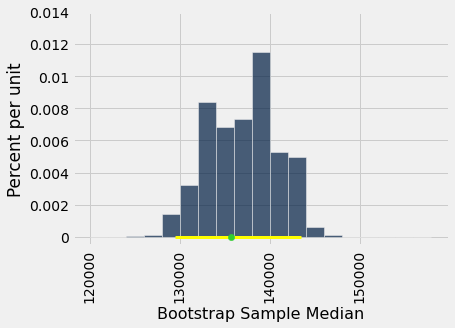

In [25]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(-0.000005, 0.00014)
plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

L'intervalle d'estimation "moyen à 95 %" a pris en compte le paramètre dans notre exemple. Mais s'agit-il d'un coup de chance ?

Pour savoir à quelle fréquence l'intervalle contient le paramètre, nous devons exécuter l'ensemble du processus encore et encore. Plus précisément, nous répliquerons le processus suivant 100 fois :

- Tirer un échantillon aléatoire original de taille 500 de la population.
- Effectuez 5 000 réplications du processus bootstrap et générez l'intervalle "moyen à 95 %" des médianes rééchantillonnées.

Nous obtiendrons 100 intervalles et compterons combien d'entre eux contiennent la médiane de la population.

**La théorie statistique du bootstrap indique que ce nombre devrait se situer autour de 95. Il peut se situer dans les années 90, mais nous ne nous attendons pas à ce qu'il soit beaucoup plus éloigné de 95 que cela.

Nous commencerons par écrire une fonction `bootstrap_median` qui prend deux arguments : le nom de la table contenant l'échantillon aléatoire original, et le nombre d'échantillons bootstrap à tirer. Elle renvoie un tableau de médianes bootstrap, une pour chaque échantillon bootstrap.

In [117]:
def bootstrap_median(original_sample, num_repetitions):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_median = percentile(50, new_bstrap_sample.column('Total Compensation'))
        medians = np.append(medians, new_bstrap_median)
    return medians

Nous allons maintenant écrire une boucle "for" qui appellera cette fonction 100 fois et collectera à chaque fois les "95% du milieu" des médianes bootstrappées.

L'exécution de la cellule ci-dessous prendra plusieurs minutes puisqu'elle doit effectuer 100 répétitions de l'échantillonnage de 500 fois au hasard dans le tableau et générer 5000 échantillons bootstrappés.

In [118]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals and put the endpoints in the table intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    original_sample = sf2019.sample(500, with_replacement=False)
    medians = bootstrap_median(original_sample, 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

Pour chacune des 100 réplications de l'ensemble du processus, nous obtenons un intervalle d'estimations de la médiane.

In [119]:
intervals

Left,Right
125093,139379
129925,140757
133955,146369
129335,140847
132756,145429
130167,143200
125935,138491
131092,142472
128509,140462
131270,145998


Les bons intervalles sont ceux qui contiennent le paramètre que nous essayons d'estimer. Généralement, le paramètre est inconnu, mais dans cette section, il se trouve que nous savons ce qu'il est.

In [120]:
pop_median

135747.0

Combien de ces 100 intervalles contiennent la médiane de la population ? C'est le nombre d'intervalles dont l'extrémité gauche est inférieure à la médiane de la population et l'extrémité droite supérieure.

In [121]:
intervals.where(
    'Left', are.below(pop_median)).where(
    'Right', are.above(pop_median)).num_rows

93

Il faut plusieurs minutes pour construire tous les intervalles, mais essayez à nouveau si vous avez de la patience. Il est très probable qu'environ 95 des 100 intervalles seront de bons intervalles : ils contiendront le paramètre.

Il est difficile de vous montrer tous les intervalles sur l'axe horizontal car ils se chevauchent largement - après tout, ils essaient tous d'estimer le même paramètre. Le graphique ci-dessous montre chaque intervalle sur les mêmes axes en les empilant verticalement. L'axe vertical est simplement le numéro de la réplication à partir de laquelle l'intervalle a été généré.

La ligne verte représente l'emplacement du paramètre. Elle a une position fixe puisque le paramètre est fixe.

Les bons intervalles couvrent le paramètre. Il y en a environ 95, en général.

Si un intervalle ne couvre pas le paramètre, c'est un raté. Les intervalles ratés sont ceux où l'on peut voir la "lumière du jour" autour de la ligne verte. Il y en a très peu - environ 5 sur 100, en général - mais cela arrive.

Toute méthode basée sur l'échantillonnage peut être erronée. La beauté des méthodes basées sur l'échantillonnage aléatoire réside dans le fait que nous pouvons quantifier la fréquence à laquelle elles sont susceptibles de se tromper.

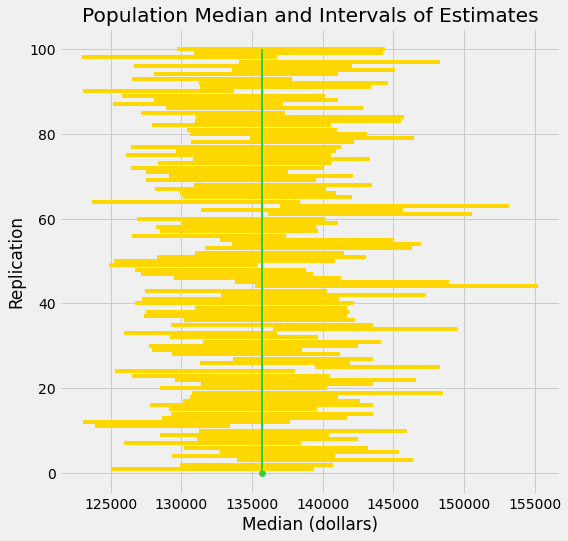

In [122]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.plot(make_array(pop_median, pop_median), make_array(0, 100), color=parameter_green, lw=2)
plots.xlabel('Median (dollars)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');

Pour résumer ce que montre la simulation, supposons que vous estimiez la médiane de la population par le processus suivant :

- Tirez un grand échantillon aléatoire de la population.
- Bootstrap votre échantillon aléatoire et obtenez une estimation à partir du nouvel échantillon aléatoire.
- Répétez l'étape bootstrap ci-dessus des milliers de fois et obtenez des milliers d'estimations.
- Choisissez l'intervalle "moyen à 95 %" de toutes les estimations.

Vous obtenez ainsi un intervalle d'estimations. Si 99 autres personnes répètent **le processus complet**, en commençant à chaque fois par un nouvel échantillon aléatoire, vous obtiendrez 100 intervalles de ce type. Environ 95 de ces 100 intervalles contiendront le paramètre de la population.

En d'autres termes, ce processus d'estimation capture le paramètre dans environ 95 % des cas.

Vous pouvez remplacer 95 % par une autre valeur, à condition qu'elle ne soit pas égale à 100. Supposons que vous remplaciez 95% par 80% et que la taille de l'échantillon reste fixée à 500. Vos intervalles d'estimation seront alors plus courts que ceux que nous avons simulés ici, car le "milieu 80%" est un intervalle plus petit que le "milieu 95%". Si vous répétez ce processus, seuls 80 % environ de vos intervalles contiendront le paramètre.

## 3. Calcul des intervalles de confiance avec le Bootstrap

Nous avons développé une méthode pour estimer un paramètre en utilisant l'échantillonnage aléatoire et le bootstrap. Notre méthode produit un intervalle d'estimations, pour tenir compte de la variabilité aléatoire de l'échantillon aléatoire. En fournissant un intervalle d'estimations au lieu d'une seule estimation, nous nous donnons une certaine marge de manœuvre.

Dans l'exemple précédent, nous avons vu que notre processus d'estimation produisait un bon intervalle environ 95 % du temps, un "bon" intervalle étant celui qui contient le paramètre. Nous disons que nous sommes *95% confiants* que le processus produit un bon intervalle. Notre intervalle d'estimations est appelé *intervalle de confiance à 95 %* pour le paramètre, et 95 % est appelé *niveau de confiance* de l'intervalle.

La méthode est appelée "méthode des percentiles bootstrap" car l'intervalle est formé en choisissant deux percentiles des estimations bootstrap.

La situation dans l'exemple précédent était un peu inhabituelle. Comme nous connaissions la valeur du paramètre, nous avons pu vérifier si un intervalle était bon ou nul, ce qui nous a permis de constater que notre processus d'estimation capturait le paramètre environ 95 fois sur 100.

Mais en général, les scientifiques des données ne connaissent pas la valeur du paramètre. C'est la raison pour laquelle ils veulent l'estimer en premier lieu. Dans de telles situations, ils fournissent un intervalle d'estimations pour le paramètre inconnu en utilisant des méthodes comme celle que nous avons développée. Grâce à la théorie statistique et à des démonstrations comme celle que nous venons de voir, les scientifiques des données peuvent être sûrs que leur processus de génération de l'intervalle aboutit à un bon intervalle dans un pourcentage connu du temps.

#### Estimation de la médiane d'une population

Nous allons maintenant utiliser la méthode bootstrap pour estimer la médiane d'une population inconnue. Vous avez déjà rencontré cet ensemble de données. Il provient d'un échantillon de nouveau-nés dans un grand système hospitalier. Nous le traiterons comme s'il s'agissait d'un échantillon aléatoire simple, bien que l'échantillonnage ait été effectué en plusieurs étapes. [Stat Labs] (https://www.stat.berkeley.edu/~statlabs/) de Deborah Nolan et Terry Speed contient des détails sur un ensemble de données plus large dont cet ensemble est tiré.

La table `births` contient les variables suivantes pour les paires mère-bébé : le poids du bébé à la naissance en onces, le nombre de jours de gestation (le nombre de jours pendant lesquels la mère était enceinte), l'âge de la mère en années révolues, la taille de la mère en pouces, le poids de la grossesse en livres et le fait que la mère ait ou non fumé pendant la grossesse.

In [2]:
births = Table.read_table(path_data + 'baby.csv')

In [3]:
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


Le poids de naissance est un facteur important pour la santé d'un nouveau-né. Les bébés de petite taille ont tendance à nécessiter davantage de soins médicaux au cours de leurs premiers jours que les nouveau-nés de plus grande taille. Il est donc utile d'avoir une estimation du poids de naissance avant la naissance du bébé. Une façon d'y parvenir est d'examiner la relation entre le poids de naissance et le nombre de jours de gestation.

Une mesure simple de cette relation est le rapport entre le poids de naissance et le nombre de jours de gestation. Le tableau `ratios` contient les deux premières colonnes de `baby`, ainsi qu'une colonne de ratios. La première entrée de cette colonne a été calculée comme suit :

$$
\frac{120~\mbox{ounces}}{284~\mbox{days}} ~\approx ~ 0.4225~ \mbox{onces par jour}
$$

In [4]:
ratios = births.select('Birth Weight', 'Gestational Days').with_columns(
    'Ratio BW:GD', births.column('Birth Weight')/births.column('Gestational Days')
)

In [5]:
ratios

Birth Weight,Gestational Days,Ratio BW:GD
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


Voici un histogramme des ratios.

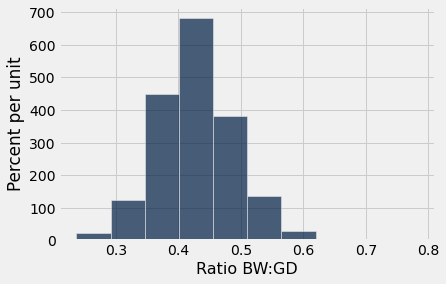

In [6]:
ratios.select('Ratio BW:GD').hist()

À première vue, l'histogramme semble assez symétrique, la densité étant maximale dans l'intervalle de 0,4 once par jour à 0,45 once par jour. Mais un examen plus approfondi révèle que certains des ratios sont assez élevés en comparaison. La valeur maximale des ratios était légèrement supérieure à 0,78 once par jour, soit presque le double de la valeur typique.

In [7]:
ratios.sort('Ratio BW:GD', descending=True).take(0)

Birth Weight,Gestational Days,Ratio BW:GD
116,148,0.783784


La médiane donne une idée du ratio type car elle n'est pas affectée par les ratios très élevés ou très faibles. Le ratio médian de l'échantillon est d'environ 0,429 once par jour.

In [8]:
percentile(50, ratios.column(2))

0.42907801418439717

Mais quelle était la médiane dans la population ? Nous ne le savons pas, nous allons donc l'estimer.

Notre méthode sera exactement la même que dans la section précédente. Nous allons bootstrapper l'échantillon 5 000 fois, ce qui nous permettra d'obtenir 5 000 estimations de la médiane. Notre intervalle de confiance à 95 % sera le "milieu à 95 %" de toutes nos estimations.

#### Construire un intervalle de confiance Bootstrap

Nous allons commencer par définir la fonction `one_bootstrap_median`. Elle va bootstrapper l'échantillon et retourner un ratio médian dans l'échantillon bootstrappé.

In [9]:
def one_bootstrap_median():
    resample = ratios.sample()
    return percentile(50, resample.column('Ratio BW:GD'))

Exécutez la cellule ci-dessous pour voir comment les ratios bootstrap varient. Rappelez-vous que chacun d'entre eux est une estimation du ratio inconnu dans la population.

In [10]:
one_bootstrap_median()

0.43010752688172044

Nous pouvons maintenant utiliser une boucle `for` pour générer 5000 médianes bootstrappées.

In [11]:
# Generate medians from 5000 bootstrap samples
num_repetitions = 5000
bstrap_medians = make_array()
for i in np.arange(num_repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

In [12]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)

make_array(left, right)

array([0.42545455, 0.43272727])

L'intervalle de confiance à 95 % va d'environ 0,425 once par jour à environ 0,433 once par jour. Nous estimons que le rapport médian "poids de naissance/jours de gestation" dans la population se situe quelque part dans l'intervalle 0,425 onces par jour à 0,433 onces par jour.

L'estimation de 0,429 basée sur l'échantillon original se trouve à mi-chemin entre les deux extrémités de l'intervalle, bien que cela ne soit pas nécessairement vrai en général.

Pour visualiser nos résultats, dessinons l'histogramme empirique de nos médianes bootstrappées et plaçons l'intervalle de confiance sur l'axe horizontal.

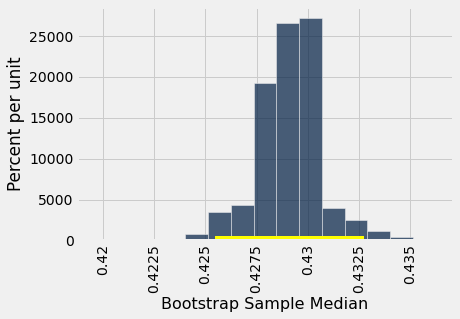

In [13]:
resampled_medians = Table().with_columns(
    'Bootstrap Sample Median', bstrap_medians
)
resampled_medians.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

Cet histogramme et cet intervalle ressemblent à ceux que nous avons dessinés dans la section précédente, avec une grande différence : il n'y a pas de point vert indiquant où se trouve le paramètre. Nous ne savons pas où ce point devrait se trouver, ni même s'il se trouve dans l'intervalle.

Nous disposons simplement d'un intervalle d'estimations. Il s'agit d'un intervalle de confiance à 95 %, car le processus qui le génère produit un bon intervalle environ 95 % du temps. C'est certainement mieux que de deviner le ratio au hasard !

N'oubliez pas que cet intervalle est un intervalle de confiance approximatif à 95 %. De nombreuses approximations interviennent dans son calcul. L'approximation n'est pas mauvaise, mais elle n'est pas exacte.

### Estimation d'une moyenne de population
Ce que nous avons fait pour les médianes peut également être fait pour les moyennes. Supposons que nous voulions estimer l'âge moyen des mères dans la population. Une estimation naturelle est l'âge moyen des mères de l'échantillon. Voici la distribution de leurs âges, et leur âge moyen qui était d'environ 27,2 ans.

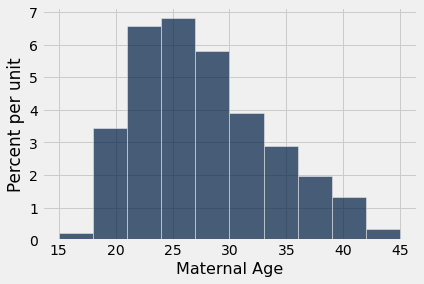

In [14]:
births.select('Maternal Age').hist()

In [15]:
np.average(births.column('Maternal Age'))

27.228279386712096

Quel était l'âge moyen des mères dans la population ? Nous ne connaissons pas la valeur de ce paramètre.

Estimons le paramètre inconnu par la méthode bootstrap. Pour ce faire, nous allons adapter le code de `bootstrap_median` pour définir à la place la fonction `bootstrap_mean`. Le code est le même sauf que les statistiques sont des moyennes (c'est-à-dire des moyennes) au lieu de médianes, et sont collectées dans un tableau appelé `bstrap_means` au lieu de `bstrap_medians`.

In [16]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [17]:
# Generate means from 5000 bootstrap samples
num_repetitions = 5000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [18]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([26.90630324, 27.55962521])

L'intervalle de confiance à 95 % va d'environ 26,9 ans à environ 27,6 ans. En d'autres termes, nous estimons que l'âge moyen des mères dans la population se situe quelque part dans l'intervalle 26,9 ans-27,6 ans.

Remarquez à quel point les deux extrémités sont proches de la moyenne d'environ 27,2 ans de l'échantillon original. La taille de l'échantillon est très importante - 1 174 mères - et les moyennes de l'échantillon ne varient donc pas beaucoup. Nous étudierons cette observation plus en détail dans le prochain chapitre.

L'histogramme empirique des 5 000 âges moyens bootstrapés est présenté ci-dessous, ainsi que l'intervalle de confiance à 95 % pour l'âge moyen de la population.

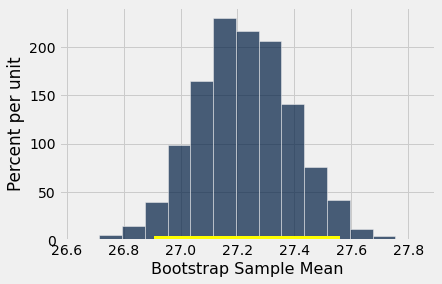

In [19]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

Une fois de plus, la moyenne de l'échantillon original (27,23 ans) est proche du centre de l'intervalle. Ce n'est pas très surprenant, car chaque échantillon bootstrap est tiré de ce même échantillon original. Les moyennes des échantillons bootstrap sont à peu près symétriquement réparties de part et d'autre de la moyenne de l'échantillon dont elles sont tirées.

Remarquez également que l'histogramme empirique des moyennes rééchantillonnées a à peu près une forme de cloche symétrique, même si l'histogramme des âges échantillonnés n'était pas du tout symétrique :

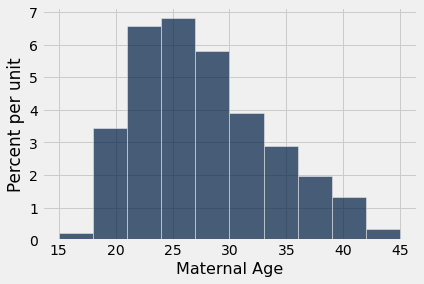

In [20]:
births.select('Maternal Age').hist()

Il s'agit d'une conséquence du théorème de la limite centrale des probabilités et des statistiques. Dans les sections suivantes, nous verrons ce que dit le théorème.

#### Intervalle de confiance à 80
Vous pouvez utiliser les moyennes de l'échantillon bootstrap pour construire un intervalle de n'importe quel niveau de confiance. Par exemple, pour construire un intervalle de confiance de 80 % pour l'âge moyen dans la population, vous devez prendre les "80 % du milieu" des moyennes rééchantillonnées. Il faudrait donc que 10 % de la distribution se trouve dans chacune des deux queues, et donc que les extrémités soient les 10e et 90e percentiles des moyennes rééchantillonnées.

In [21]:
left_80 = percentile(10, bstrap_means)
right_80 = percentile(90, bstrap_means)
make_array(left_80, right_80)

array([27.01277683, 27.44293015])

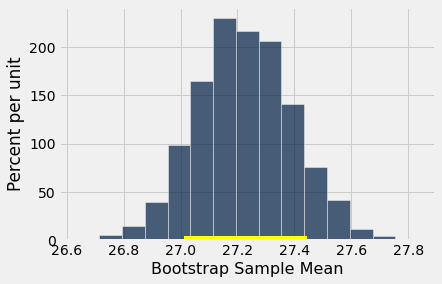

In [22]:
resampled_means.hist(bins=15)
plots.plot([left_80, right_80], [0, 0], color='yellow', lw=8);

Cet intervalle de confiance à 80 % est beaucoup plus court que l'intervalle de confiance à 95 %. Il va d'environ 27,0 ans à environ 27,4 ans. Bien qu'il s'agisse d'un ensemble serré d'estimations, vous savez que ce processus ne produit un bon intervalle que dans 80 % des cas.

Le processus précédent produisait un intervalle plus large, mais nous avions davantage confiance dans le processus qui l'avait généré.

Pour obtenir un intervalle de confiance étroit à un niveau de confiance élevé, il faut commencer par un échantillon plus large. Nous verrons pourquoi dans le prochain chapitre.

### Estimation d'une proportion de la population
Dans l'échantillon, 39% des mères ont fumé pendant leur grossesse.

In [23]:
births.where('Maternal Smoker', are.equal_to(True)).num_rows / births.num_rows

0.3909710391822828

Rappelez-vous qu'une proportion est une moyenne de zéros et de uns. Ainsi, la proportion de mères fumeuses pourrait également être calculée à l'aide d'opérations sur les tableaux, comme suit.

In [24]:
smoking = births.column('Maternal Smoker')
np.count_nonzero(smoking) / len(smoking)

0.3909710391822828

Quel est le pourcentage de mères de la population qui ont fumé pendant leur grossesse ? Il s'agit d'un paramètre inconnu que nous pouvons estimer par un intervalle de confiance bootstrap. Les étapes sont analogues à celles que nous avons suivies pour estimer la médiane et la moyenne de la population.

Dans un processus qui nous est maintenant familier, nous commencerons par définir une fonction `one_bootstrap_proportion` qui bootstrap l'échantillon et renvoie la proportion de fumeurs dans l'échantillon bootstrap. Ensuite, nous appellerons la fonction plusieurs fois en utilisant une boucle `for`, et nous obtiendrons le 2,5ème percentile et le 97,5ème percentile des proportions bootstrappées.

In [25]:
def one_bootstrap_proportion():
    resample = births.sample()
    smoking = resample.column('Maternal Smoker')
    return np.count_nonzero(smoking) / len(smoking)

In [26]:
# Generate proportions from 5000 bootstrap samples
bstrap_proportions = make_array()
num_repetitions = 5000
for i in np.arange(num_repetitions):
    bstrap_proportions = np.append(bstrap_proportions, one_bootstrap_proportion())

In [27]:
# Get the endpoints of the 95% confidence interval
left = percentile(2.5, bstrap_proportions)
right = percentile(97.5, bstrap_proportions)

make_array(left, right)

array([0.36286201, 0.41908007])

L'intervalle de confiance va d'environ 36% à environ 42%.

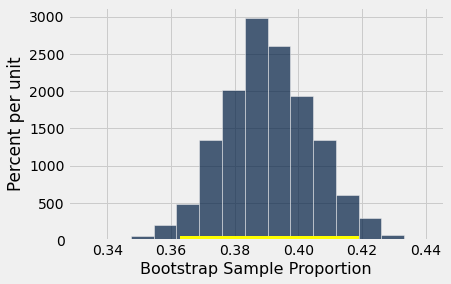

In [28]:
resampled_proportions = Table().with_columns(
    'Bootstrap Sample Proportion', bstrap_proportions
)
resampled_proportions.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

### Précautions à prendre lors de l'utilisation de la méthode du percentile bootstrap
Le bootstrap est une méthode élégante et puissante. Avant de l'utiliser, il est important de garder certains points à l'esprit.

- Commencez par un grand échantillon aléatoire. Dans le cas contraire, la méthode risque de ne pas fonctionner. Son succès repose sur le fait que les grands échantillons aléatoires (et donc aussi les rééchantillons de l'échantillon) ressemblent à la population. La loi des moyennes indique que c'est probablement le cas si l'échantillon aléatoire est de grande taille.

- Pour obtenir une approximation de la distribution de probabilité d'une statistique, il est bon de répéter la procédure de rééchantillonnage autant de fois que possible. Quelques milliers de répétitions permettront d'obtenir des approximations correctes de la distribution de la médiane de l'échantillon, en particulier si la distribution de la population présente un seul pic et est relativement symétrique. Nous avons utilisé 5 000 réplications dans nos exemples, mais nous recommandons d'en utiliser 10 000 en général.

- La méthode bootstrap des percentiles fonctionne bien pour estimer la médiane ou la moyenne de la population à partir d'un grand échantillon aléatoire. Toutefois, comme toutes les méthodes d'estimation, elle présente des limites. Par exemple, on ne s'attend pas à ce qu'elle donne de bons résultats dans les situations suivantes.
    - L'objectif est d'estimer la valeur minimale ou maximale de la population, ou un percentile très faible ou très élevé, ou des paramètres qui sont fortement influencés par des éléments rares de la population.
    - La distribution de probabilité de la statistique n'est pas grossièrement en forme de cloche.
    - L'échantillon initial est très petit, disons moins de 10 ou 15.



## 4. Utilisation des intervalles de confiance

Un intervalle de confiance n'a qu'un seul but : estimer un paramètre inconnu sur la base des données d'un échantillon aléatoire. Dans la dernière section, nous avons dit que l'intervalle (36%, 42%) était un intervalle de confiance approximatif à 95% pour le pourcentage de fumeuses parmi les mères de la population. Il s'agissait d'une façon formelle de dire que, selon notre estimation, le pourcentage de fumeuses parmi les mères de la population se situait quelque part entre 36% et 42%, et que notre processus d'estimation est correct environ 95% du temps.

Il est important de résister à l'envie d'utiliser les intervalles de confiance à d'autres fins. Par exemple, rappelons que nous avons calculé l'intervalle (26,9 ans, 27,6 ans) comme un intervalle de confiance approximatif à 95 % pour l'âge moyen des mères dans la population. Une mauvaise utilisation de l'intervalle, malheureusement courante, consiste à conclure qu'environ 95 % des femmes avaient entre 26,9 ans et 27,6 ans. Il n'est pas nécessaire d'avoir de grandes connaissances en matière d'intervalles de confiance pour comprendre que ce n'est pas possible : on ne s'attend pas à ce que 95 % des mères soient toutes âgées de quelques mois les unes des autres. En effet, l'histogramme des âges échantillonnés montre une variation assez importante.

In [2]:
births = Table.read_table(path_data + 'baby.csv')

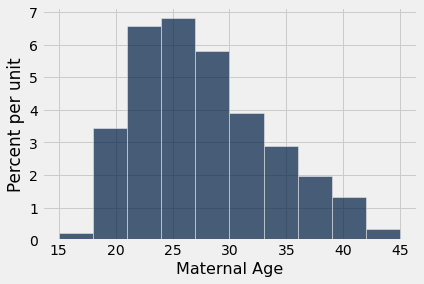

In [3]:
births.select('Maternal Age').hist()

Un petit pourcentage des âges échantillonnés se trouve dans l'intervalle (26,9, 27,6), et on peut s'attendre à un petit pourcentage similaire dans la population. L'intervalle ne fait qu'estimer un nombre : la *moyenne* de tous les âges de la population.

Cependant, l'estimation d'un paramètre par des intervalles de confiance a une utilité importante qui ne se limite pas à nous indiquer approximativement l'importance du paramètre.

### Utilisation d'un intervalle de confiance pour tester des hypothèses
Notre intervalle de confiance approximatif à 95 % pour l'âge moyen de la population va de 26,9 ans à 27,6 ans. Supposons que l'on veuille tester les hypothèses suivantes :

**Hypothèse nulle:** L'âge moyen de la population est de 30 ans.

**Hypothèse alternative:** L'âge moyen de la population n'est pas de 30 ans.

Si vous utilisiez le seuil de 5 % pour la valeur p, vous rejetteriez l'hypothèse nulle. En effet, 30 ans n'est pas dans l'intervalle de confiance à 95 % de la moyenne de la population. Au seuil de signification de 5 %, 30 n'est pas une valeur plausible pour la moyenne de la population.

Cette utilisation des intervalles de confiance est le résultat d'une *dualité* entre les intervalles de confiance et les tests : si vous testez si la moyenne de la population est ou non une valeur particulière *x*, et que vous utilisez le seuil de 5 % pour la valeur p, vous rejetterez l'hypothèse nulle si *x* n'est pas dans votre intervalle de confiance à 95 % pour la moyenne.

Cela peut être établi par la théorie statistique. En pratique, il suffit de vérifier si la valeur spécifiée dans l'hypothèse nulle se trouve ou non dans l'intervalle de confiance.

Si vous utilisiez le seuil de 1 % pour la valeur P, vous devriez vérifier si la valeur spécifiée dans l'hypothèse nulle se trouve dans un intervalle de confiance de 99 % pour la moyenne de la population.

En gros, ces affirmations sont également vraies pour les proportions de la population, à condition que l'échantillon soit grand.

Alors que nous disposons désormais d'un moyen d'utiliser des intervalles de confiance pour tester un type particulier d'hypothèse, vous pouvez vous interroger sur l'intérêt de tester si l'âge moyen d'une population est égal ou non à 30 ans. En effet, l'intérêt n'est pas évident. Mais il existe certaines situations dans lesquelles un test de ce type d'hypothèse est à la fois naturel et utile.

### Comparaison des scores de base et des scores après traitement

Nous étudierons cette question dans le contexte de données qui constituent un sous-ensemble des informations recueillies dans le cadre d'un essai contrôlé randomisé portant sur les traitements de la maladie de Hodgkin. La maladie de Hodgkin est un cancer qui touche généralement les jeunes. La maladie est guérissable, mais le traitement peut être très dur. L'objectif de l'essai était de trouver une posologie qui permettrait de guérir le cancer tout en minimisant les effets indésirables sur les patients.

La table ``hodgkins`` contient des données sur l'effet du traitement sur les poumons de 22 patients. Les colonnes sont les suivantes :

- Taille en cm
- Une mesure de l'irradiation du manteau (cou, poitrine, sous les bras)
- Une mesure de la chimiothérapie
- Un score de la santé des poumons au départ, c'est-à-dire au début du traitement ; des scores plus élevés correspondent à des poumons plus sains.
- Le même score de santé pulmonaire, 15 mois après le traitement.

In [4]:
hodgkins = Table.read_table(path_data + 'hodgkins.csv')

In [5]:
hodgkins.show(3)

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33


Nous allons comparer les scores de base et les scores à 15 mois. Comme chaque ligne correspond à un patient, nous disons que l'échantillon des scores de base et l'échantillon des scores à 15 mois sont *appariés* - il ne s'agit pas simplement de deux ensembles de 22 valeurs chacun, mais de 22 paires de valeurs, une pour chaque patient.

En un coup d'œil, vous pouvez voir que les scores à 15 mois ont tendance à être plus bas que les scores de base - les poumons des patients de l'échantillon semblent se porter moins bien 15 mois après le traitement. Cela est confirmé par les valeurs majoritairement positives de la colonne `drop`, c'est-à-dire l'ampleur de la baisse du score entre la ligne de base et les 15 mois.

In [6]:
hodgkins = hodgkins.with_columns(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)

In [7]:
hodgkins

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
168,311,180,98.24,67.62,30.62
173,388,239,129.04,133.33,-4.29
157,370,168,85.41,81.28,4.13
160,468,151,67.94,79.26,-11.32
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
175,529,264,87.45,56.48,30.97
185,392,240,149.84,106.99,42.85
178,479,216,92.24,73.43,18.81


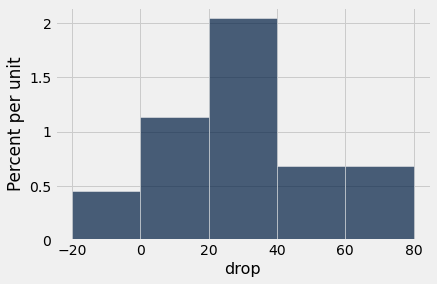

In [8]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [9]:
np.average(hodgkins.column('drop'))

28.615909090909096

Dans l'échantillon, la baisse moyenne est d'environ 28,6. Mais cela pourrait-il être le résultat d'une variation aléatoire ? Les données proviennent d'un échantillon aléatoire. Se pourrait-il que dans l'ensemble de la population de patients, la baisse moyenne soit de 0 ?

Pour répondre à cette question, nous pouvons émettre deux hypothèses :

**Hypothèse nulle:** Dans la population, la baisse moyenne est de 0.

**Hypothèse alternative:** Dans la population, la baisse moyenne n'est pas 0.

Pour tester cette hypothèse avec un seuil de 1% pour la valeur p, construisons un intervalle de confiance approximatif de 99% pour la baisse moyenne dans la population.

In [10]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [11]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [12]:
# Get the endpoints of the 99% confidence interval
left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

make_array(left, right)

array([17.46863636, 40.97681818])

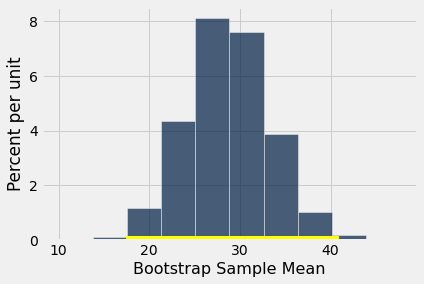

In [13]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist()
plots.plot([left, right], [0, 0], color='yellow', lw=8);

L'intervalle de confiance à 99% pour la baisse moyenne dans la population va d'environ 17 à environ 40. L'intervalle ne contient pas 0. Nous rejetons donc l'hypothèse nulle.

Mais remarquez que nous avons fait mieux que simplement conclure que la baisse moyenne dans la population n'est pas 0. Nous avons estimé l'ampleur de la baisse moyenne. C'est un résultat plus utile que de dire simplement "Ce n'est pas 0".

**Note sur la précision:** Notre intervalle de confiance est assez large, pour deux raisons principales :
- Le niveau de confiance est élevé (99 %).
- La taille de l'échantillon est relativement faible par rapport à celle des exemples précédents.

Dans le prochain chapitre, nous examinerons comment la taille de l'échantillon affecte la précision. Nous examinerons également comment les distributions empiriques des moyennes d'échantillons sont si souvent en forme de cloche, même si les distributions des données sous-jacentes ne sont pas du tout en forme de cloche.

### Endnote
La terminologie d'un domaine provient généralement des principaux chercheurs de ce domaine. [Brad Efron](https://en.wikipedia.org/wiki/Bradley_Efron), qui a été le premier à proposer la technique du bootstrap, a utilisé un terme qui a des [origines américaines](https://en.wikipedia.org/wiki/Bootstrapping). Pour ne pas être en reste, les statisticiens chinois ont [proposé leur propre méthode] (http://econpapers.repec.org/article/eeestapro/v_3a37_3ay_3a1998_3ai_3a4_3ap_3a321-329.htm).

## 5. L'importance de la moyenne (facultatif)

Dans ce cours, nous avons étudié plusieurs statistiques différentes, notamment la distance de variation totale, le maximum, la médiane et la moyenne. En partant d'hypothèses claires sur le caractère aléatoire, nous avons tracé les distributions empiriques de toutes ces statistiques. Certaines, comme le maximum et la distance de variation totale, ont des distributions clairement asymétriques dans un sens ou dans l'autre. Mais la distribution empirique de la moyenne de l'échantillon s'est presque toujours avérée proche de la forme d'une cloche, quelle que soit la population étudiée.

Si une propriété des échantillons aléatoires est vraie "quelle que soit la population", elle devient un puissant outil d'inférence, car nous savons rarement beaucoup de choses sur les données de la population entière. La distribution de la moyenne d'un grand échantillon aléatoire entre dans cette catégorie de propriétés. C'est pourquoi les moyennes d'échantillons aléatoires sont largement utilisées dans la science des données.

Dans ce chapitre, nous étudierons les moyennes et ce que nous pouvons dire à leur sujet en ne posant que des hypothèses minimales sur les populations sous-jacentes. Les questions que nous aborderons sont les suivantes :

- Que mesure exactement la moyenne ?
- Dans quelle mesure la plupart des données sont-elles proches de la moyenne ?
- Comment la taille de l'échantillon est-elle liée à la variabilité de la moyenne de l'échantillon ?
- Pourquoi les distributions empiriques des moyennes d'échantillons aléatoires sont-elles en forme de cloche ?
- Comment pouvons-nous utiliser efficacement les moyennes d'échantillon à des fins d'inférence ?

### Propriétés de la moyenne

Dans ce cours, nous avons utilisé les mots "moyenne" et "moyenne" de manière interchangeable, et nous continuerons à le faire. La définition de la moyenne vous est familière depuis vos études secondaires ou même avant.

**La *moyenne* d'une collection de nombres est la somme de tous les éléments de la collection, divisée par le nombre d'éléments de la collection.

Les méthodes `np.average` et `np.mean` renvoient la moyenne d'un tableau.

In [2]:
not_symmetric = make_array(2, 3, 3, 9)

In [3]:
np.average(not_symmetric)

4.25

In [4]:
np.mean(not_symmetric)

4.25

#### Propriétés de base

La définition et l'exemple ci-dessus mettent en évidence certaines propriétés de la moyenne.

- Il n'est pas nécessaire qu'elle soit un élément de la collection.
- Elle ne doit pas nécessairement être un entier, même si tous les éléments de la collection sont des entiers.
- Elle se situe entre la plus petite et la plus grande valeur de la collection.
- Il n'est pas nécessaire qu'elle se situe à mi-chemin entre les deux extrêmes ; il n'est généralement pas vrai que la moitié des éléments d'une collection se situe au-dessus de la moyenne.
- Si la collection est constituée de valeurs d'une variable mesurée dans des unités spécifiées, la moyenne a également les mêmes unités.

Nous allons maintenant étudier d'autres propriétés utiles pour comprendre la moyenne et sa relation avec d'autres statistiques.

#### La moyenne est plus lisse

On peut considérer la moyenne comme une opération d'"égalisation" ou de "lissage". Par exemple, imaginez que les entrées de `not_symmetric` ci-dessus représentent les dollars dans les poches de quatre personnes différentes. Pour obtenir la moyenne, vous mettez d'abord tout l'argent dans un grand pot, puis vous le divisez équitablement entre les quatre personnes. Au départ, les quatre personnes avaient des montants différents dans leurs poches (2 $, 3 $, 3 $ et 9 $), mais maintenant chaque personne a 4,25 $, le montant moyen.

#### Les proportions sont des moyennes
Si une collection n'est composée que de uns et de zéros, alors la somme de la collection est le nombre de uns qu'elle contient, et la moyenne de la collection est la proportion de uns.

In [5]:
zero_one = make_array(1, 1, 1, 0)
sum(zero_one)

3

In [6]:
np.mean(zero_one)

0.75

Vous pouvez remplacer 1 par le booléen `True` et 0 par `False` :

In [7]:
np.mean(make_array(True, True, True, False))

0.75

Les proportions étant un cas particulier de moyennes, les résultats concernant les moyennes des échantillons aléatoires s'appliquent également aux proportions des échantillons aléatoires.

#### La moyenne et l'histogramme
La moyenne de la collection {2, 3, 3, 9} est de 4,25, ce qui n'est pas le "point médian" des données. Que mesure donc la moyenne ?

Pour le savoir, il faut savoir que la moyenne peut être calculée de différentes manières.

$$\begin{align*}
\mbox{moyenne} ~ &=~ 4.25 \\ \\
&=~ \frac{2 + 3 + 3 + 9}{4} 
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{1}{4} ~~ + ~~ 9 \cdot \frac{1}{4} 
&=~ 2 \cdot \frac{1}{4} ~~ + ~~ 3 \cdot \frac{2}{4} ~~ + ~~ 9 \cdot \frac{1}{4} 
&=~ 2 \cdot 0.25 ~~ + ~~ 3 \cdot 0.5 ~~ + ~~ 9 \cdot 0.25
\N-END{align*}}$$$

La dernière expression est un exemple d'un fait général : lorsque nous calculons la moyenne, chaque valeur distincte de la collection est *pondérée* par la proportion de fois où elle apparaît dans la collection.

Cela a une conséquence importante. La moyenne d'une collection ne dépend que des valeurs distinctes et de leurs proportions, et non du nombre d'éléments de la collection. En d'autres termes, la moyenne d'une collection ne dépend que de la distribution des valeurs dans la collection.

Par conséquent, **si deux collections ont la même distribution, alors elles ont la même moyenne**.

Par exemple, voici une autre collection qui a la même distribution que `not_symmetric` et donc la même moyenne.

In [8]:
not_symmetric

array([2, 3, 3, 9])

In [9]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
np.mean(same_distribution)

4.25

La moyenne est un attribut physique de l'histogramme de la distribution. Voici l'histogramme de la distribution de `not_symmetric` ou, de manière équivalente, la distribution de `same_distribution`.

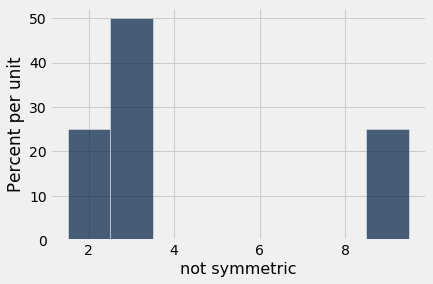

In [10]:
t1 = Table().with_columns('not symmetric', not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))

Imaginez que l'histogramme est une figure en carton attachée à un fil qui court le long de l'axe horizontal, et imaginez que les barres sont des poids attachés aux valeurs 2, 3 et 9. Supposez que vous essayez de faire tenir cette figure en équilibre sur un point du fil. Si le point est proche de 2, la figure basculera vers la droite. Si le point est proche de 9, la figure basculera vers la gauche. Quelque part entre les deux se trouve le point d'équilibre de la figure ; ce point est le 4,25, la moyenne.

**La moyenne est le centre de gravité ou le point d'équilibre de l'histogramme.

Pour comprendre pourquoi il en est ainsi, il est utile de connaître quelques notions de physique. Le centre de gravité est calculé exactement comme nous avons calculé la moyenne, en utilisant les valeurs distinctes pondérées par leurs proportions.

La moyenne étant un point d'équilibre, elle est parfois représentée sous la forme d'un *fulcrum* ou d'un triangle à la base de l'histogramme.

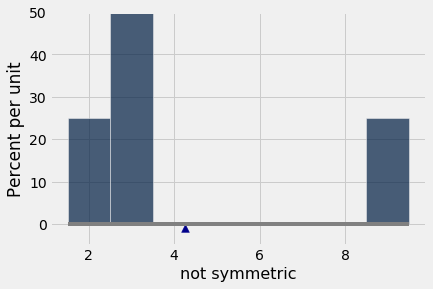

In [11]:
mean_ns = np.mean(not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_ns, -0.009, marker='^', color='darkblue', s=60)
plots.plot([1.5, 9.5], [0, 0], color='grey')
plots.ylim(-0.05, 0.5);

#### La moyenne et la médiane

Si la note d'un élève à un test est inférieure à la moyenne, cela signifie-t-il que l'élève se situe dans la moitié inférieure de la classe pour ce test ?

Heureusement pour l'élève, la réponse est : "Pas nécessairement". La raison tient à la relation entre la moyenne, qui est le point d'équilibre de l'histogramme, et la médiane, qui est le "point médian" des données.

Cette relation est facile à mettre en évidence dans un exemple simple. Voici un histogramme de la collection {2, 3, 3, 4} qui se trouve dans le tableau `symmetric`. La distribution est symétrique par rapport à 3. La moyenne et la médiane sont toutes deux égales à 3.

In [12]:
symmetric = make_array(2, 3, 3, 4)

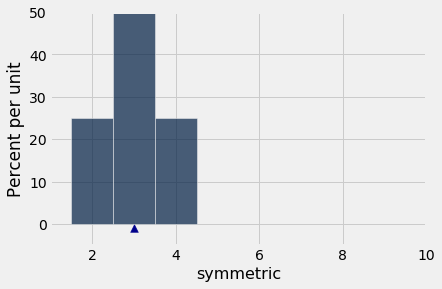

In [13]:
t2 = Table().with_columns('symmetric', symmetric)
mean_s = np.mean(symmetric)

t2.hist(bins=np.arange(1.5, 4.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.xlim(1, 10)
plots.ylim(-0.05, 0.5);

In [14]:
np.mean(symmetric)

3.0

In [15]:
percentile(50, symmetric)

3

En général, **pour les distributions symétriques, la moyenne et la médiane sont égales**.

Que se passe-t-il si la distribution n'est pas symétrique ? Comparons `symétrique` et `non_symétrique`.

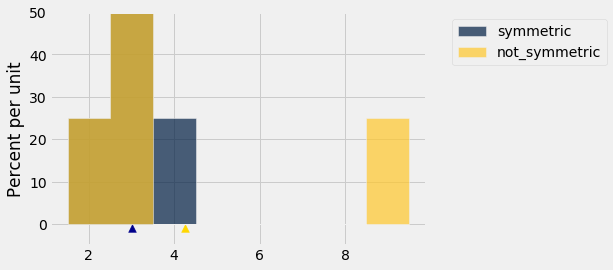

In [16]:
t3 = t2.with_column(
        'not_symmetric', not_symmetric
)

t3.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.scatter(mean_ns, -0.009, marker='^', color='gold', s=60)
plots.ylim(-0.05, 0.5);

L'histogramme bleu représente la distribution `symétrique` originale. L'histogramme doré de `not_symmetric` commence de la même manière que l'histogramme bleu à l'extrémité gauche, mais sa barre la plus à droite a glissé vers la valeur 9. La partie brune est l'endroit où les deux histogrammes se chevauchent.

La médiane et la moyenne de la distribution bleue sont toutes deux égales à 3. La médiane de la distribution dorée est également égale à 3, bien que la moitié droite soit distribuée différemment de la gauche.

Mais la moyenne de la distribution de l'or n'est pas 3 : l'histogramme de l'or ne s'équilibrerait pas à 3. Le point d'équilibre s'est déplacé vers la droite, à 4,25.

Dans la distribution de l'or, 3 entrées sur 4 (75 %) sont inférieures à la moyenne. L'élève dont le score est inférieur à la moyenne peut donc se rassurer. Il se trouve peut-être dans la majorité de la classe.

En général, **si l'histogramme a une queue d'un côté (le terme formel est "asymétrique"), la moyenne est éloignée de la médiane dans la direction de la queue**.

##### Exemple
Le tableau `sf2015` contient des données sur les salaires et les avantages sociaux des employés de la ville de San Francisco en 2015. Comme précédemment, nous limiterons notre analyse à ceux qui avaient l'équivalent d'un emploi à mi-temps pour l'année.

In [17]:
sf2015 = Table.read_table(path_data + 'san_francisco_2015.csv').where('Salaries', are.above(10000))

Comme nous l'avons vu précédemment, la rémunération la plus élevée était supérieure à 600 000 dollars, mais la grande majorité des employés avaient une rémunération inférieure à 300 000 dollars.

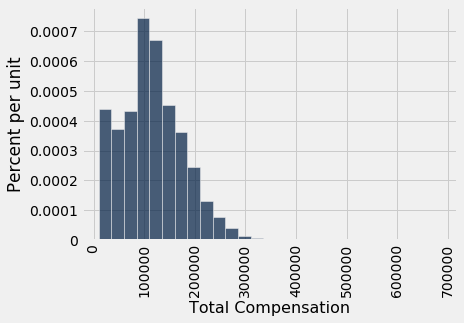

In [18]:
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))

Cet histogramme est asymétrique vers la droite ; il a une queue à droite.

La moyenne s'éloigne de la médiane dans la direction de la queue. Nous nous attendons donc à ce que la compensation moyenne soit supérieure à la médiane, ce qui est effectivement le cas.

In [19]:
compensation = sf2015.column('Total Compensation')
percentile(50, compensation)

110305.79

In [20]:
np.mean(compensation)

114725.98411824222

Les distributions des revenus des grandes populations ont tendance à être asymétriques vers la droite. Lorsque la majeure partie d'une population a des revenus moyens ou faibles, mais qu'une très petite proportion a des revenus très élevés, l'histogramme présente une longue et fine queue vers la droite.

Le revenu moyen est affecté par cette queue : plus la queue s'étire vers la droite, plus la moyenne augmente. En revanche, la médiane n'est pas affectée par les valeurs situées aux extrémités de la distribution. C'est pourquoi les économistes résument souvent les distributions de revenus par la médiane plutôt que par la moyenne.

### Variabilité
La moyenne nous indique le point d'équilibre d'un histogramme. Mais dans presque tous les histogrammes que nous avons vus, les valeurs s'étalent de part et d'autre de la moyenne. Jusqu'où peuvent-elles s'éloigner de la moyenne ? Pour répondre à cette question, nous allons développer une mesure de la variabilité autour de la moyenne.

Nous commencerons par décrire comment calculer cette mesure. Nous verrons ensuite pourquoi il s'agit d'une bonne mesure.

#### La taille approximative des écarts par rapport à la moyenne
Pour des raisons de simplicité, nous commencerons nos calculs dans le contexte d'un simple tableau `any_numbers` composé de seulement quatre valeurs. Comme vous le verrez, notre méthode s'appliquera facilement à tout autre tableau de valeurs.

In [2]:
any_numbers = make_array(1, 2, 2, 10)

L'objectif est de mesurer approximativement l'écart entre les chiffres et leur moyenne. Pour ce faire, nous avons d'abord besoin de la moyenne :

In [3]:
# Step 1. The average.

mean = np.mean(any_numbers)
mean

3.75

Ensuite, nous allons déterminer la distance qui sépare chaque valeur de la moyenne. C'est ce qu'on appelle les *écarts par rapport à la moyenne*. Un "écart par rapport à la moyenne" est simplement une valeur moins la moyenne. Le tableau `calculation_steps` affiche les résultats.

In [4]:
# Step 2. The deviations from average.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


Certains écarts sont négatifs ; ils correspondent à des valeurs inférieures à la moyenne. Les écarts positifs correspondent à des valeurs supérieures à la moyenne.

Pour calculer approximativement l'ampleur des écarts, il est naturel de calculer la moyenne des écarts. Mais il se passe quelque chose d'intéressant lorsque l'on additionne tous les écarts :

In [5]:
sum(deviations)

0.0

Les écarts positifs annulent exactement les écarts négatifs. Cela est vrai pour toutes les listes de nombres, quel que soit l'histogramme de la liste : **la somme des écarts par rapport à la moyenne est nulle**.

Puisque la somme des écarts est égale à 0, la moyenne des écarts sera également égale à 0 :

In [6]:
np.mean(deviations)

0.0

Pour cette raison, la moyenne des écarts n'est pas une mesure utile de la taille des écarts. Ce que nous voulons vraiment savoir, c'est l'ampleur approximative des écarts, qu'ils soient positifs ou négatifs. Nous avons donc besoin d'un moyen d'éliminer les signes des écarts.

Il existe deux façons traditionnelles de perdre les signes : la valeur absolue et le carré. Il s'avère que le carré permet de construire une mesure aux propriétés extrêmement puissantes, dont certaines seront étudiées dans le cadre de ce cours.

Éliminons donc les signes en élevant tous les écarts au carré. Ensuite, nous prendrons la moyenne des carrés :

In [7]:
# Step 3. The squared deviations from average

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [8]:
# Step 4. Variance = the mean squared deviation from average

variance = np.mean(squared_deviations)
variance

13.1875

**Variance:** L'écart quadratique moyen calculé ci-dessus est appelé *variance* des valeurs.

Bien que la variance nous donne une idée de la dispersion, elle ne se situe pas sur la même échelle que la variable originale puisque ses unités sont le carré de la variable originale. Cela rend l'interprétation très difficile.

Nous revenons donc à l'échelle originale en prenant la racine carrée positive de la variance :

In [9]:
# Step 5.
# Standard Deviation:    root mean squared deviation from average
# Steps of calculation:   5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

#### Écart-type

La quantité que nous venons de calculer s'appelle l'"écart type" de la liste et est abrégée en "écart-type". Il mesure approximativement la distance entre les nombres de la liste et leur moyenne.

**L'écart-type d'une liste est défini comme la *racine carrée moyenne des écarts par rapport à la moyenne*. Ce n'est pas une mince affaire. Mais lisez-le de droite à gauche et vous obtiendrez la séquence des étapes du calcul.

**Les cinq étapes décrites ci-dessus permettent d'obtenir l'écart-type. Vous pouvez également utiliser la fonction ``np.std`` pour calculer l'écart-type des valeurs d'un tableau :

In [10]:
np.std(any_numbers)

3.6314597615834874

#### Travailler avec le SD

Pour voir ce que nous pouvons apprendre du SD, passons à un jeu de données plus intéressant que `any_numbers`. La table `nba13` contient des données sur les joueurs de la National Basketball Association (NBA) en 2013. Pour chaque joueur, la table enregistre la position à laquelle le joueur joue habituellement, sa taille en pouces, son poids en livres et son âge en années.

In [11]:
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


Voici un histogramme des tailles des joueurs.

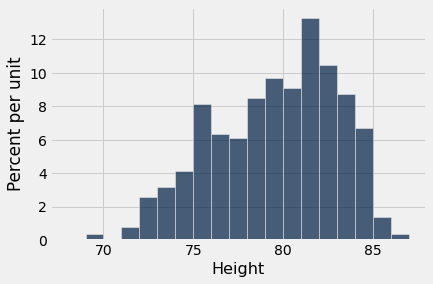

In [12]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

Il n'est pas surprenant que les joueurs de la NBA soient grands ! Leur taille moyenne est d'un peu plus de 79 pouces (6'7"), soit environ 10 pouces de plus que la taille moyenne des hommes aux États-Unis.

In [13]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

Quel est l'écart entre la taille des joueurs et la moyenne ? Cet écart est mesuré par l'écart-type des tailles, qui est d'environ 3,45 pouces.

In [14]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

L'imposant centre Hasheem Thabeet du Thunder d'Oklahoma City a été le joueur le plus grand avec une taille de 87 pouces.

In [15]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


Thabeet dépassait la taille moyenne d'environ 8 pouces.

In [16]:
87 - mean_height

7.934653465346528

Il s'agit d'un écart par rapport à la moyenne, qui représente environ 2,3 fois l'écart-type :

In [17]:
(87 - mean_height)/sd_height

2.2995015194397923

En d'autres termes, la taille du joueur le plus grand était supérieure à la moyenne d'environ 2,3 écarts types.

Avec une taille de 69 pouces, Isaiah Thomas était l'un des deux joueurs les plus petits de la NBA en 2013. Sa taille était d'environ 2,9 écarts-type en dessous de la moyenne.

In [18]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [19]:
(69 - mean_height)/sd_height

-2.9169868288775844

Ce que nous avons observé, c'est que les joueurs les plus grands et les plus petits étaient tous deux à quelques écarts de la taille moyenne. C'est un exemple de la raison pour laquelle l'écart-type est une mesure utile de la dispersion. Quelle que soit la forme de l'histogramme, la moyenne et l'écart-type en disent long sur la position de l'histogramme sur la droite numérique.

#### Première raison principale de mesurer l'écart par le DD

**Dans tous les ensembles de données numériques, la plupart des entrées se situent dans l'intervalle "moyenne $\pm$ quelques écarts types".

Pour l'instant, résistez au désir de savoir exactement ce que signifient des mots flous tels que "masse" et "quelques". Nous les préciserons plus tard dans cette section. Examinons simplement la déclaration dans le contexte de quelques autres exemples.

Nous avons déjà vu que *toutes* les tailles des joueurs de la NBA se situaient dans la fourchette "moyenne $\pm$ 3 SDs".

Qu'en est-il des âges ? Voici un histogramme de la distribution, ainsi que la moyenne et l'écart-type des âges.

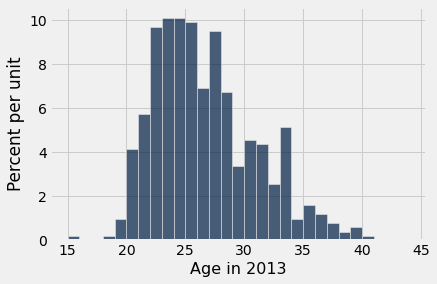

In [20]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [21]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)

L'âge moyen était légèrement supérieur à 26 ans et l'écart-type était d'environ 4,3 ans.

Quel est l'écart entre les âges et la moyenne ? Comme nous l'avons fait pour les hauteurs, prenons un exemple.

Juwan Howard est le joueur le plus âgé, à 40 ans.

In [22]:
nba13.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Steve Nash,Guard,75,178,39
Derek Fisher,Guard,73,210,39


L'âge d'Howard était supérieur à la moyenne d'environ 3,2 écarts types.

In [23]:
(40 - mean_age)/sd_age

3.1958482778922357

Ce que nous avons observé pour les tailles et les âges est vrai en général. Pour *toutes* les listes, la plupart des entrées ne s'écartent pas de plus de 2 ou 3 écarts-type de la moyenne.

#### Limites de Tchebychev
Le mathématicien russe [Pafnuty Chebychev] (https://en.wikipedia.org/wiki/Pafnuty_Chebyshev) (1821-1894) a prouvé un résultat qui rend nos déclarations approximatives précises.

**Pour toutes les listes et tous les nombres $z$, la proportion d'entrées qui sont dans l'intervalle
"average $\pm z$ SDs" est au moins $1 - \frac{1}{z^2}$.**

Il est important de noter que le résultat donne une limite, et non une valeur exacte ou une approximation.

Ce qui fait la force de ce résultat, c'est qu'il est vrai pour toutes les listes - toutes les distributions, quelle que soit leur irrégularité.

Plus précisément, il dit que pour toute liste :

- la proportion dans l'intervalle "moyenne $\pm$ 2 SDs" est **au moins 1 - 1/4 = 0,75**

- la proportion dans l'intervalle "moyenne $\pm$ 3 SDs" est **au moins 1 - 1/9 $\approx$ 0.89**

- la proportion dans l'intervalle "moyenne $\pm$ 4.5 SDs" est **au moins 1 - 1/$\boldsymbol{4.5^2}$ $\approx$ 0.95**

Comme nous l'avons noté plus haut, le résultat de Tchebychev donne une limite inférieure, et non une réponse exacte ou une approximation. Par exemple, le pourcentage d'entrées dans l'intervalle "moyenne $\pm ~2$ SDs" pourrait être beaucoup plus élevé que 75%. Mais il ne peut pas être plus petit.

#### Unités standard

Dans les calculs ci-dessus, la quantité $z$ mesure les *unités standard*, c'est-à-dire le nombre d'écarts types au-dessus de la moyenne.

Certaines valeurs des unités standard sont négatives, correspondant à des valeurs initiales inférieures à la moyenne. D'autres valeurs d'unités standard sont positives. Mais quelle que soit la distribution de la liste, les bornes de Tchebychev impliquent que les unités standard se situent généralement dans l'intervalle (-5, 5).

Pour convertir une valeur en unités standard, il faut d'abord déterminer l'écart par rapport à la moyenne, puis comparer cet écart à l'écart-type.

$$
z ~=~ \frac{\mbox{valeur }-\mbox{moyenne}}{\mbox{SD}}
$$

Comme nous le verrons, les unités standard sont fréquemment utilisées dans l'analyse des données. Il est donc utile de définir une fonction qui convertit un tableau de nombres en unités standard.

In [24]:
def standard_units(numbers_array):
    "Convert any array of numbers to standard units."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

#### Exemple
Comme nous l'avons vu dans une section précédente, la table `united` contient une colonne `Delay` constituée des temps de retard au départ, en minutes, de plus de milliers de vols United Airlines au cours de l'été 2015. Nous allons créer une nouvelle colonne appelée `Delay (Standard Units)` en appliquant la fonction `standard_units` à la colonne des temps de retard. Cela nous permet de voir tous les temps de retard en minutes ainsi que leurs valeurs correspondantes en unités standard.

In [25]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


Les unités standard que nous pouvons voir sont conformes à ce que nous attendons sur la base des bornes de Tchebychev. La plupart d'entre elles sont assez petites ; une seule est supérieure à 6.

Mais quelque chose d'assez alarmant se produit lorsque nous trions les temps de retard du plus élevé au plus faible. Les unités standard que nous pouvons voir sont extrêmement élevées !

In [26]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


Cela montre qu'il est possible que les données soient supérieures à la moyenne de plusieurs écarts types (et que les vols soient retardés de près de 10 heures). La valeur la plus élevée du retard est supérieure à 14 en unités standard.

Cependant, la proportion de ces valeurs extrêmes est faible et les bornes de Tchebychev restent valables. Calculons, par exemple, le pourcentage de délais compris dans l'intervalle "moyenne $\pm$ 3 SD". Il s'agit du même pourcentage de temps pour lesquels les unités standard sont comprises dans l'intervalle (-3, 3). Ce pourcentage est d'environ 98 %, comme calculé ci-dessous, ce qui est cohérent avec la limite de Tchebychev d'"au moins 89 %".

In [27]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

L'histogramme des délais est présenté ci-dessous, avec l'axe horizontal en unités standard. D'après le tableau ci-dessus, la queue droite s'étend jusqu'à $z=14,27$ unités standard (580 minutes). La zone de l'histogramme en dehors de l'intervalle $z=-3$ à $z=3$ est d'environ 2% et se compose de petits morceaux qui sont pratiquement invisibles dans l'histogramme.

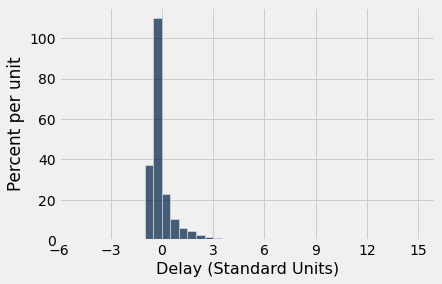

In [28]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));

### L'écart-type et la courbe normale

Nous savons que la moyenne est le point d'équilibre de l'histogramme. Contrairement à la moyenne, l'écart-type n'est généralement pas facile à identifier en regardant l'histogramme.

Cependant, il existe une forme de distribution pour laquelle l'écart-type est presque aussi clairement identifiable que la moyenne. Il s'agit de la distribution en forme de cloche. Cette section examine cette forme, qui apparaît fréquemment dans les histogrammes de probabilité et dans certains histogrammes de données.  

#### Un histogramme de données grossièrement en forme de cloche
Examinons la distribution des tailles des mères dans notre échantillon familier de 1 174 paires mère-nouveau-né. Les tailles des mères ont une moyenne de 64 pouces et un écart-type de 2,5 pouces. Contrairement aux tailles des joueurs de basket-ball, les tailles des mères sont distribuées de manière assez symétrique autour de la moyenne, sous la forme d'une courbe en cloche.

In [2]:
baby = Table.read_table(path_data + 'baby.csv')

In [3]:
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [4]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

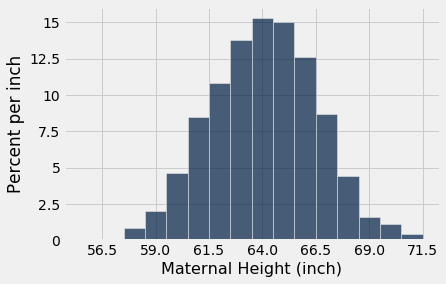

In [5]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit='inch')
positions = np.arange(-3, 3.1, 1)*sd_height + mean_height
plots.xticks(positions);

Les deux dernières lignes de code dans la cellule ci-dessus modifient l'étiquetage de l'axe horizontal. Désormais, les étiquettes correspondent à la "moyenne $\pm$ $z$ SDs" pour $z = 0, \pm 1, \pm 2$, et $\pm 3$. En raison de la forme de la distribution, le "centre" a une signification non ambiguë et est clairement visible à 64.

#### Comment repérer la DS sur une courbe en forme de cloche

Pour voir comment l'écart-type est lié à la courbe, commencez par le haut de la courbe et regardez vers la droite. Remarquez qu'il y a un endroit où la courbe passe de l'aspect d'une "coupe à l'envers" à celui d'une "coupe à l'endroit" ; formellement, la courbe a un point d'inflexion. Ce point est un SD au-dessus de la moyenne. Il s'agit du point $z=1$, qui correspond à la "moyenne plus 1 écart-type" = 66,5 pouces.

Symétriquement à la gauche de la moyenne, le point d'inflexion se situe à $z=-1$, soit "moyenne moins 1 écart-type" = 61,5 pouces.

En général, **pour les distributions en forme de cloche, l'écart-type est la distance entre la moyenne et les points d'inflexion de chaque côté**.

#### La courbe normale standard

Tous les histogrammes en forme de cloche que nous avons vus se ressemblent essentiellement, à l'exception des étiquettes sur les axes. En effet, il n'existe qu'une seule courbe de base à partir de laquelle toutes ces courbes peuvent être tracées en changeant les étiquettes des axes de manière appropriée.

Pour tracer cette courbe de base, nous utiliserons les unités dans lesquelles nous pouvons convertir chaque liste : les unités standard. La courbe résultante est donc appelée *courbe normale standard*.

La courbe normale standard possède une équation impressionnante. Mais pour l'instant, il est préférable de la considérer comme le contour lissé d'un histogramme d'une variable qui a été mesurée en unités standard et dont la distribution est en forme de cloche.

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

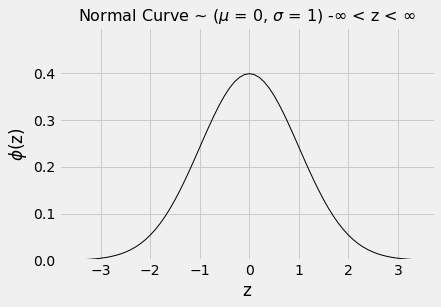

In [6]:
# The standard normal curve

plot_normal_cdf()

Comme toujours lorsque vous examinez un nouvel histogramme, commencez par regarder l'axe horizontal. Sur l'axe horizontal de la courbe normale standard, les valeurs sont des unités standard.

Voici quelques propriétés de la courbe. Certaines sont évidentes à l'observation, d'autres nécessitent une quantité considérable de mathématiques pour être établies.

- L'aire totale sous la courbe est de 1. On peut donc la considérer comme un histogramme dessiné sur l'échelle de densité.

- La courbe est symétrique par rapport à 0. Par conséquent, si une variable a cette distribution, sa moyenne et sa médiane sont toutes deux égales à 0.

- Les points d'inflexion de la courbe se situent à -1 et +1.

- Si une variable possède cette distribution, son écart-type est de 1. La courbe normale est l'une des rares distributions dont l'écart-type est aussi clairement identifiable sur l'histogramme.

Puisque nous considérons la courbe comme un histogramme lissé, nous voudrons représenter les proportions de la quantité totale de données par des zones sous la courbe.

Les aires sous les courbes lisses sont souvent déterminées par le calcul, à l'aide d'une méthode appelée intégration. Cependant, en mathématiques, la courbe normale standard ne peut être intégrée par aucune des méthodes de calcul habituelles.

Par conséquent, les aires sous la courbe doivent être approximées. C'est pourquoi presque tous les manuels de statistiques contiennent des tableaux d'aires sous la courbe normale. C'est également la raison pour laquelle tous les systèmes statistiques, y compris un module de Python, incluent des méthodes qui fournissent d'excellentes approximations de ces aires.

In [7]:
from scipy import stats

#### Le "cdf" normal standard

La fonction fondamentale pour trouver les aires sous la courbe normale est `stats.norm.cdf`. Elle prend un argument numérique et renvoie toutes les aires sous la courbe à gauche de ce nombre. Formellement, on l'appelle la "fonction de distribution cumulative" de la courbe normale standard. Cette expression peu commode est abrégée en cdf.

Utilisons cette fonction pour trouver l'aire à gauche de $z=1$ sous la courbe normale standard.

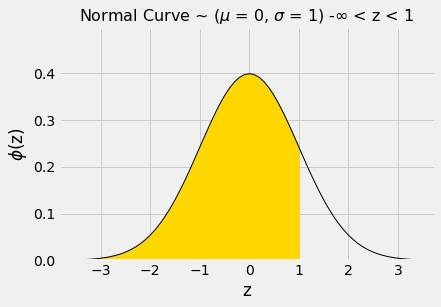

In [8]:
# Area under the standard normal curve, below 1

plot_normal_cdf(1)

La valeur numérique de la zone ombrée peut être trouvée en appelant `stats.norm.cdf`.

In [9]:
stats.norm.cdf(1)

0.8413447460685429

Cela représente environ 84 %. Nous pouvons maintenant utiliser la symétrie de la courbe et le fait que l'aire totale sous la courbe est égale à 1 pour trouver d'autres aires.

L'aire à droite de $z=1$ est d'environ 100% - 84% = 16%.

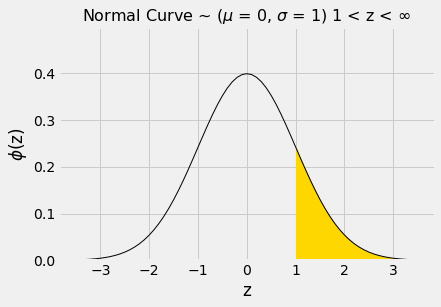

In [10]:
# Area under the standard normal curve, above 1

plot_normal_cdf(lbound=1)

In [11]:
1 - stats.norm.cdf(1)

0.15865525393145707

L'aire comprise entre $z=-1$ et $z=1$ peut être calculée de différentes manières.  Il s'agit de l'aire dorée sous la courbe ci-dessous.

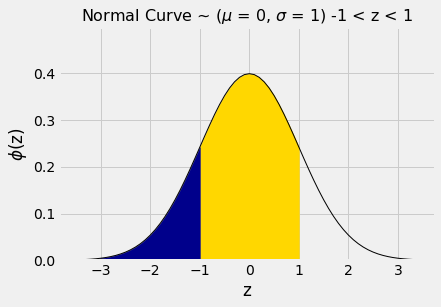

In [12]:
# Area under the standard normal curve, between -1 and 1

plot_normal_cdf(1, lbound=-1)

Par exemple, nous pourrions calculer la surface comme "100% - deux queues égales", ce qui donne approximativement 100% - 2x16% = 68%.

On peut aussi noter que l'aire entre $z=1$ et $z=-1$ est égale à toute l'aire à gauche de $z=1$, moins toute l'aire à gauche de $z=-1$.

In [13]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

Par un calcul similaire, nous voyons que la zone entre $-2$ et 2 est d'environ 95%.

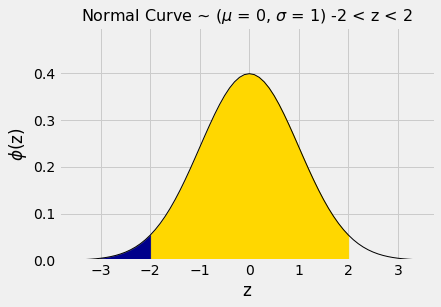

In [14]:
# Area under the standard normal curve, between -2 and 2

plot_normal_cdf(2, lbound=-2)

In [15]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

En d'autres termes, si un histogramme est grossièrement en forme de cloche, la proportion de données dans l'intervalle "moyenne $\pm$ 2 SDs" est d'environ 95%.

C'est beaucoup plus que la limite inférieure de Tchebychev, qui est de 75 %. La limite de Tchebychev est plus faible parce qu'elle doit fonctionner pour toutes les distributions. Si nous savons qu'une distribution est normale, nous disposons de bonnes approximations des proportions, et pas seulement de bornes.

Le tableau ci-dessous compare ce que nous savons sur toutes les distributions et sur les distributions normales. Remarquez que lorsque $z=1$, la limite de Tchebychev est correcte mais n'est pas éclairante.

| Pourcentage dans l'intervalle | Toutes les distributions : Toutes les distributions : limite | Distribution normale : Approximation |
| :--------------- | :------------------------ | :--------------------------------- |
| moyenne $\pm$ 1 SD | au moins 0% | environ 68% | moyenne $\pm$ 2 SD | au moins 75% | environ 95% |
| moyenne $\pm$ 2 SDs | au moins 75 % | environ 95 % | moyenne $\pm$ 2 SDs | au moins 75 % | environ 95 % | moyenne $\pm$ 3 SDs
| moyenne $\pm$ 3 SDs | au moins 88.888...% | environ 99.73% |

In [2]:
colors = Table.read_table(path_data + 'roulette_wheel.csv').column('Color')
pockets = make_array('0','00')
for i in np.arange(1, 37):
    pockets = np.append(pockets, str(i)) 

wheel = Table().with_columns(
    'Pocket', pockets,
    'Color', colors
)

### Le théorème de la limite centrale
Très peu des histogrammes de données que nous avons vus dans ce cours avaient une forme de cloche. Lorsque nous avons rencontré une distribution en forme de cloche, il s'agissait presque toujours d'un histogramme empirique d'une statistique basée sur un échantillon aléatoire.

Les exemples ci-dessous montrent deux situations très différentes dans lesquelles une forme de cloche approximative apparaît dans de tels histogrammes.

#### Gain net à la roulette
Dans une section précédente, la cloche est apparue comme la forme approximative de la somme totale d'argent que nous gagnerions si nous placions la même mise à plusieurs reprises sur différents tours d'une roulette.

In [3]:
wheel

Pocket,Color
0,green
00,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


Rappelons que le pari sur le rouge rapporte une somme égale, 1 pour 1. Nous avons défini la fonction `red_winnings` qui renvoie le gain net d'un pari de \$1 sur le rouge. Plus précisément, la fonction prend une couleur comme argument et renvoie 1 si la couleur est rouge. Pour toutes les autres couleurs, elle renvoie -1.

In [4]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

Le tableau `red` montre les gains de chaque poche sur le rouge.

In [5]:
red = wheel.with_column(
    'Winnings: Red', wheel.apply(red_winnings, 'Color')
    )
red

Pocket,Color,Winnings: Red
0,green,-1
00,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


Votre gain net sur un pari est un tirage aléatoire dans la colonne "Gains : Rouge". Il y a 18/38 chances de gagner 1$ et 20/38 chances de gagner - 1$. Cette distribution de probabilité est illustrée dans l'histogramme ci-dessous.

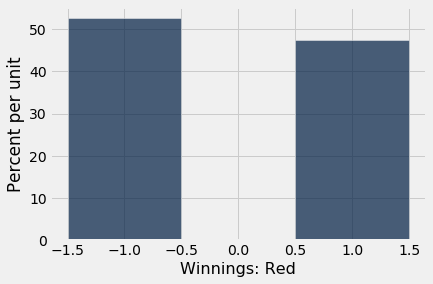

In [6]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

Supposons maintenant que vous ayez misé plusieurs fois sur le rouge. Votre gain net sera la somme des nombreux tirages effectués au hasard avec remplacement à partir de la distribution ci-dessus.

Il faudrait un peu de mathématiques pour dresser la liste de toutes les valeurs possibles de vos gains nets et de toutes leurs chances. Nous ne le ferons pas ; à la place, nous approcherons la distribution de probabilité par simulation, comme nous l'avons fait tout au long de ce cours.

Le code ci-dessous simule votre gain net si vous misez 1 $ sur le rouge sur 400 tours différents de la roulette.

In [7]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column(
    'Net Gain on Red', net_gain_red
    )

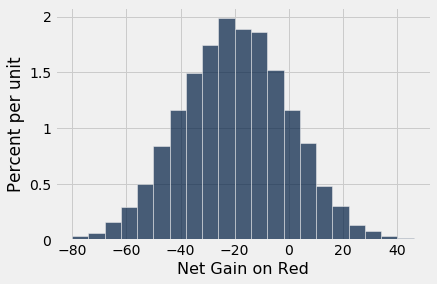

In [8]:
results.hist(bins=np.arange(-80, 50, 6))

Il s'agit d'un histogramme en forme de cloche, même si la distribution dont nous nous inspirons est loin d'avoir la forme d'une cloche.

**La distribution est centrée autour de -20 dollars, en gros. Pour comprendre pourquoi, notez que vos gains seront de 1 dollar sur environ 18/38 des paris, et de 1 dollar sur les 20/38 restants. Vos gains moyens par dollar misé seront donc d'environ -5,26 cents :

In [9]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

Ainsi, en 400 paris, vous vous attendez à ce que votre gain net soit d'environ -21 dollars :

In [10]:
400 * average_per_bet

-21.052631578947366

Pour confirmation, nous pouvons calculer la moyenne des 10 000 gains nets simulés :

In [11]:
np.mean(results.column(0))

-20.9586

**Passez votre regard le long de la courbe en commençant par le centre et remarquez que le point d'inflexion est proche de 0. Sur une courbe en forme de cloche, l'écart-type est la distance entre le centre et le point d'inflexion. Le centre se situe approximativement à -20$, ce qui signifie que l'écart-type de la distribution est d'environ 20$.

Dans la section suivante, nous verrons d'où vient ce montant de 20 $. Pour l'instant, confirmons notre observation en calculant simplement l'écart-type des 10 000 gains nets simulés :

In [12]:
np.std(results.column(0))

20.029115957525438

**Le gain net de 400 paris est la somme des 400 montants gagnés sur chaque pari individuel. La distribution de probabilité de cette somme est approximativement normale, avec une moyenne et un écart-type que nous pouvons approximer.

#### Retard moyen d'un vol
Le tableau `united` contient des données sur les retards au départ de 13 825 vols domestiques de United Airlines au départ de l'aéroport de San Francisco durant l'été 2015. Comme nous l'avons vu précédemment, la distribution des retards a une longue queue à droite.

In [13]:
united = Table.read_table(path_data + 'united_summer2015.csv')

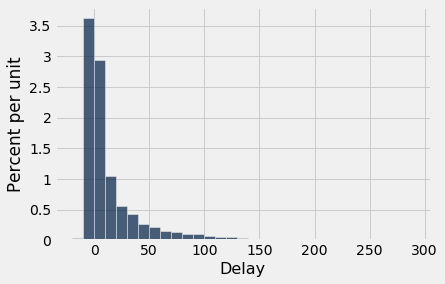

In [14]:
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

Le délai moyen était d'environ 16,6 minutes et l'écart-type d'environ 39,5 minutes. Remarquez l'importance de l'écart-type par rapport à la moyenne. Ces écarts importants sur la droite ont un effet, même s'ils ne représentent qu'une très faible proportion des données.

In [15]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))

mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

Supposons maintenant que nous ayons échantillonné 400 retards au hasard avec remplacement. Vous pouvez échantillonner sans remplacement si vous le souhaitez, mais les résultats seront très similaires à ceux de l'échantillonnage avec remplacement. Si vous échantillonnez quelques centaines de personnes sur 13 825 sans remplacement, vous ne modifiez pratiquement pas la population à chaque fois que vous retirez une valeur.

Dans l'échantillon, quel pourrait être le délai moyen ? Nous nous attendons à ce qu'il soit de l'ordre de 16 ou 17, car c'est la moyenne de la population ; mais il est probable qu'il soit un peu différent. Voyons ce que nous obtenons par échantillonnage. Nous travaillerons avec le tableau `delay` qui ne contient que la colonne des retards.

In [16]:
delay = united.select('Delay')

In [17]:
np.mean(delay.sample(400).column('Delay'))

15.59

La moyenne de l'échantillon varie en fonction de la manière dont l'échantillon est obtenu. Nous simulerons donc le processus d'échantillonnage à plusieurs reprises et dessinerons l'histogramme empirique de la moyenne de l'échantillon. Il s'agira d'une approximation de l'histogramme de probabilité de la moyenne de l'échantillon.

In [18]:
sample_size = 400
repetitions = 10000

means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means
)

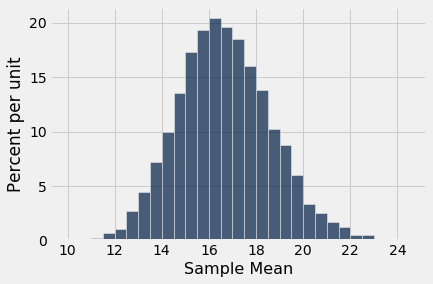

In [19]:
results.hist(bins=np.arange(10, 25, 0.5))

Une fois de plus, nous observons une forme de cloche approximative, même si nous tirons parti d'une distribution très asymétrique. La cloche est centrée quelque part entre 16 et 17, comme nous nous y attendions.

#### Théorème de la limite centrale

La raison pour laquelle la forme de cloche apparaît dans de tels contextes est un résultat remarquable de la théorie des probabilités appelé **théorème de la limite centrale**.

**Le théorème de la limite centrale stipule que la distribution de probabilité de la somme ou de la moyenne d'un grand échantillon aléatoire tiré avec remplacement sera à peu près normale, *indépendamment de la distribution de la population dont l'échantillon est tiré*.

Comme nous l'avons noté lors de l'étude des bornes de Tchebychev, les résultats qui peuvent être appliqués à des échantillons aléatoires *indépendamment de la distribution de la population* sont très puissants, car en science des données, nous connaissons rarement la distribution de la population.

Le théorème de la limite centrale permet de faire des déductions avec très peu de connaissances sur la population, à condition de disposer d'un grand échantillon aléatoire. C'est pourquoi il est au cœur du domaine de l'inférence statistique.

#### Proportion de fleurs violettes
Rappelez-vous le modèle de probabilité de Mendel pour les couleurs des fleurs d'une espèce de pois. Selon ce modèle, les couleurs des fleurs des plantes sont comparables à des tirages au hasard avec remplacement parmi {Pourpre, Pourpre, Pourpre, Blanc}.

Dans un grand échantillon de plantes, quelle proportion environ aura des fleurs violettes ? Nous nous attendons à ce que la réponse soit d'environ 0,75, soit la proportion de violet dans le modèle. Et comme les proportions sont des moyennes, le théorème de la limite centrale indique que la distribution de la proportion de plantes violettes de l'échantillon est à peu près normale.

Nous pouvons le confirmer par simulation. Simulons la proportion de plantes à fleurs violettes dans un échantillon de 200 plantes.

In [20]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')

model = Table().with_column('Color', colors)

model

Color
Purple
Purple
Purple
White


In [21]:
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

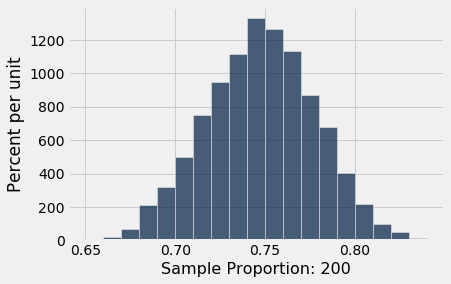

In [22]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

On retrouve la courbe normale, telle que prédite par le théorème de la limite centrale, centrée autour de 0,75, comme on pouvait s'y attendre.

Comment cette distribution évoluerait-elle si nous augmentions la taille de l'échantillon ? Exécutons à nouveau le code avec un échantillon de 800 personnes et rassemblons les résultats des simulations dans le même tableau que celui dans lequel nous avons rassemblé les simulations basées sur un échantillon de 200 personnes. Nous conserverons le même nombre de "répétitions" que précédemment afin que les deux colonnes aient la même longueur.

In [23]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

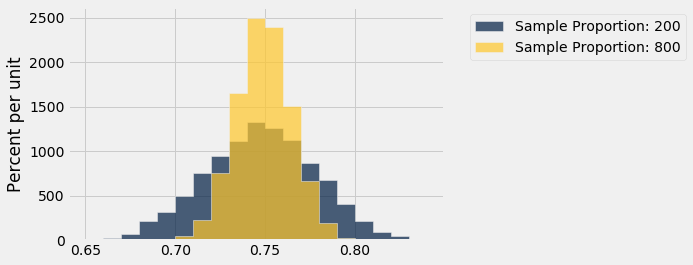

In [24]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

Les deux distributions sont approximativement normales, mais l'une est plus étroite que l'autre. Les proportions basées sur un échantillon de 800 personnes sont plus étroitement groupées autour de 0,75 que celles basées sur un échantillon de 200 personnes. L'augmentation de la taille de l'échantillon a réduit la variabilité de la proportion de l'échantillon.

Cela ne devrait pas être surprenant.  Nous nous sommes souvent appuyés sur l'intuition qu'une taille d'échantillon plus importante réduit généralement la variabilité d'une statistique.  Toutefois, dans le cas d'une moyenne d'échantillon, nous pouvons *quantifier* la relation entre la taille de l'échantillon et la variabilité.

Comment la taille de l'échantillon affecte-t-elle exactement la variabilité d'une moyenne ou d'une proportion d'échantillon ? C'est la question que nous examinerons dans la section suivante.

### La variabilité de la moyenne de l'échantillon
D'après le théorème de la limite centrale, la distribution de probabilité de la moyenne d'un grand échantillon aléatoire est à peu près normale. La courbe en cloche est centrée sur la moyenne de la population. Certaines moyennes de l'échantillon sont plus élevées, d'autres plus basses, mais les écarts par rapport à la moyenne de la population sont à peu près symétriques de part et d'autre, comme nous l'avons vu à plusieurs reprises. Formellement, la théorie des probabilités montre que la moyenne de l'échantillon est une estimation *non biaisée* de la moyenne de la population.

Dans nos simulations, nous avons également remarqué que les moyennes des grands échantillons ont tendance à être plus étroitement regroupées autour de la moyenne de la population que les moyennes des petits échantillons. Dans cette section, nous allons quantifier la variabilité de la moyenne de l'échantillon et développer une relation entre la variabilité et la taille de l'échantillon.

Commençons par notre tableau des retards de vols. Le retard moyen est d'environ 16,7 minutes et la distribution des retards est asymétrique vers la droite.

In [2]:
united = Table.read_table(path_data + 'united_summer2015.csv')
delay = united.select('Delay')

In [3]:
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

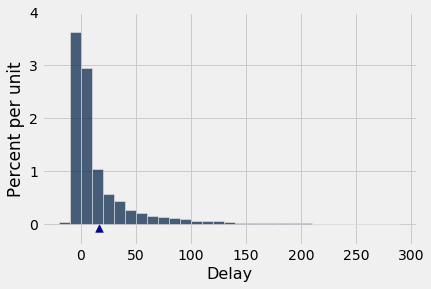

In [4]:
delay.hist(bins=np.arange(-20, 300, 10))
plots.scatter(pop_mean, -0.0008, marker='^', color='darkblue', s=60)
plots.ylim(-0.004, 0.04);

Prenons maintenant des échantillons aléatoires et examinons la distribution de probabilité de la moyenne de l'échantillon. Comme d'habitude, nous utiliserons la simulation pour obtenir une approximation empirique de cette distribution.

Nous allons définir une fonction `simulate_sample_mean` pour ce faire, parce que nous allons faire varier la taille de l'échantillon plus tard. Les arguments sont le nom du tableau, l'étiquette de la colonne contenant la variable, la taille de l'échantillon et le nombre de simulations.

In [5]:
"""Empirical distribution of random sample means"""

def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = make_array()

    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Simulons la moyenne d'un échantillon aléatoire de 100 retards, puis de 400 retards, et enfin de 625 retards. Nous effectuerons 10 000 répétitions de chacun de ces processus. Les lignes `xlim` et `ylim` définissent les axes de manière cohérente dans tous les tracés pour faciliter la comparaison. Vous pouvez simplement ignorer ces deux lignes de code dans chaque cellule.

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.672836
Population SD: 39.480199851609314
SD of sample means: 3.92467202924066


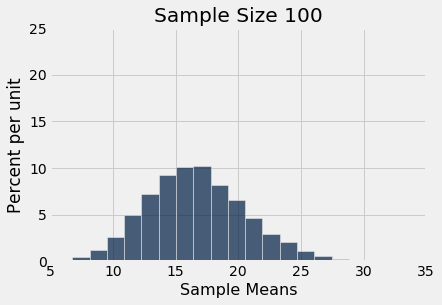

In [6]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.678091499999997
Population SD: 39.480199851609314
SD of sample means: 1.9474592014668113


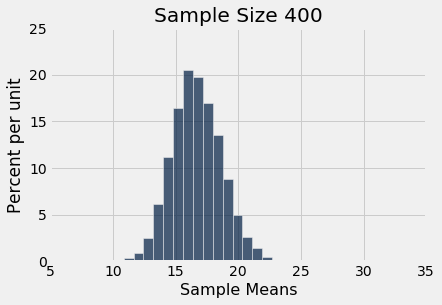

In [7]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.649224
Population SD: 39.480199851609314
SD of sample means: 1.5883338034053167


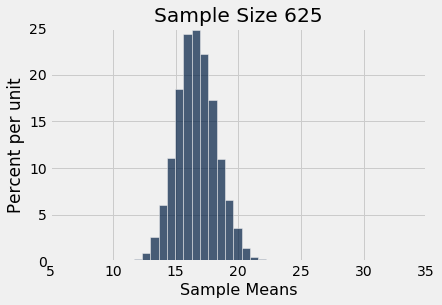

In [8]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Vous pouvez voir le théorème de la limite centrale en action - les histogrammes des moyennes des échantillons sont à peu près normaux, même si l'histogramme des retards eux-mêmes est loin d'être normal.

Vous pouvez également constater que chacun des trois histogrammes des moyennes des échantillons est centré très près de la moyenne de la population. Dans chaque cas, la "moyenne des moyennes des échantillons" est très proche de 16,66 minutes, la moyenne de la population. Les deux valeurs sont indiquées dans l'impression au-dessus de chaque histogramme. Comme prévu, la moyenne de l'échantillon est une estimation non biaisée de la moyenne de la population.

#### L'écart-type de toutes les moyennes de l'échantillon

Vous pouvez également constater que les histogrammes deviennent plus étroits, et donc plus hauts, à mesure que la taille de l'échantillon augmente. Nous l'avons déjà vu, mais nous allons maintenant nous intéresser de plus près à la mesure de la dispersion.

L'écart-type de la population de tous les retards est d'environ 40 minutes.

In [9]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

Examinez les écarts types dans les histogrammes des moyennes d'échantillons ci-dessus. Dans les trois cas, l'écart-type de la population des retards est d'environ 40 minutes, car tous les échantillons ont été prélevés dans la même population.

Regardez maintenant l'écart-type des 10 000 moyennes d'échantillon, lorsque la taille de l'échantillon est de 100. Cet écart-type est d'environ un dixième de l'écart-type de la population. Lorsque la taille de l'échantillon est de 400, l'écart-type de toutes les moyennes de l'échantillon est d'environ un vingtième de l'écart-type de la population. Lorsque la taille de l'échantillon est de 625, l'écart-type des moyennes de l'échantillon est d'environ un vingt-cinquième de l'écart-type de la population.

Il semble judicieux de comparer l'écart-type de la distribution empirique des moyennes de l'échantillon à la quantité "écart-type de la population divisé par la racine carrée de la taille de l'échantillon".

Voici les valeurs numériques. Pour chaque taille d'échantillon dans la première colonne, 10 000 échantillons aléatoires de cette taille ont été tirés et les moyennes des 10 000 échantillons ont été calculées. La deuxième colonne contient l'écart-type de ces 10 000 moyennes d'échantillon. La troisième colonne contient le résultat du calcul "écart-type de la population divisé par la racine carrée de la taille de l'échantillon".

L'exécution de la cellule prend un certain temps, car il s'agit d'une simulation de grande envergure. Mais vous verrez rapidement que l'attente en vaut la peine.

In [10]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)

In [11]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
25,7.94482,7.89604
50,5.6131,5.58334
75,4.57417,4.55878
100,3.98687,3.94802
125,3.49769,3.53122
150,3.22776,3.22354
175,3.00675,2.98442
200,2.77764,2.79167
225,2.64268,2.63201
250,2.49447,2.49695


Les valeurs des deuxième et troisième colonnes sont très proches. Si nous représentons chacune de ces colonnes avec la taille de l'échantillon sur l'axe horizontal, les deux graphiques sont pratiquement indiscernables.

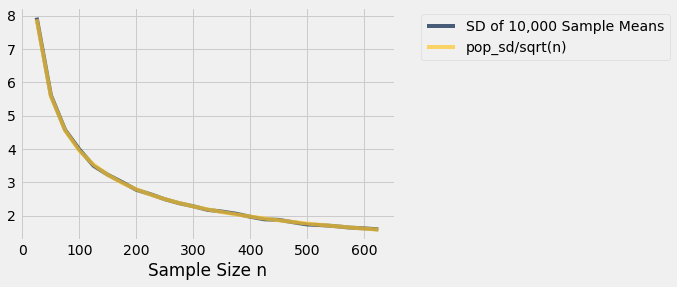

In [12]:
sd_comparison.plot('Sample Size n')

Il y a vraiment deux courbes à cet endroit. Mais elles sont si proches l'une de l'autre qu'on a l'impression qu'il n'y en a qu'une.

Ce que nous voyons est un exemple d'un résultat général. N'oubliez pas que le graphique ci-dessus est basé sur 10 000 réplications pour chaque taille d'échantillon. Mais il y a bien plus de 10 000 échantillons de chaque taille. La distribution de probabilité de la moyenne de l'échantillon est basée sur les moyennes de *tous les échantillons possibles* d'une taille fixe.

**Si les échantillons sont tirés au hasard avec remplacement à partir de la population, alors

$$
{\mbox{SD de toutes les moyennes possibles de l'échantillon}} ~=~
\frac{\mbox{DS de la population}{\sqrt{\mbox{taille de l'échantillon}}}
$$

Il s'agit de l'écart-type des moyennes de tous les échantillons possibles. **Il mesure approximativement l'écart entre les moyennes des échantillons et la moyenne de la population.

#### Théorème de la limite centrale pour la moyenne de l'échantillon
Si vous tirez un grand échantillon aléatoire avec remplacement d'une population, alors, quelle que soit la distribution de la population, la distribution de probabilité de la moyenne de l'échantillon est à peu près normale, centrée sur la moyenne de la population, avec un écart-type égal à l'écart-type de la population divisé par la racine carrée de la taille de l'échantillon.

#### La précision de la moyenne de l'échantillon
L'écart-type de toutes les moyennes possibles de l'échantillon mesure la variabilité de la moyenne de l'échantillon. En tant que tel, il est considéré comme une mesure de la précision de la moyenne de l'échantillon en tant qu'estimation de la moyenne de la population. Plus l'écart-type est petit, plus l'estimation est précise.

La formule montre que :
- La taille de la population n'affecte pas la précision de la moyenne de l'échantillon. La taille de la population n'apparaît nulle part dans la formule.
- L'écart-type de la population est une constante ; il est le même pour chaque échantillon tiré de la population. La taille de l'échantillon peut varier. Comme la taille de l'échantillon figure au dénominateur, la variabilité de la moyenne de l'échantillon *diminue* à mesure que la taille de l'échantillon augmente, et donc la précision augmente.

#### La loi de la racine carrée
Le tableau des comparaisons d'écart-type montre que l'écart-type des moyennes d'échantillons aléatoires de 25 retards de vol est d'environ 8 minutes. Si vous multipliez la taille de l'échantillon par 4, vous obtiendrez des échantillons de taille 100. L'écart-type des moyennes de tous ces échantillons est d'environ 4 minutes. C'est moins que 8 minutes, mais ce n'est pas 4 fois plus petit ; c'est seulement 2 fois plus petit. Cela s'explique par le fait que la taille de l'échantillon au dénominateur a une racine carrée. La taille de l'échantillon a augmenté d'un facteur 4, mais l'écart-type a diminué d'un facteur $2 = \sqrt{4}$. En d'autres termes, la précision a augmenté d'un facteur de $2 = \sqrt{4}$.

En général, lorsque vous multipliez la taille de l'échantillon par un facteur, la précision de la moyenne de l'échantillon augmente de la racine carrée de ce facteur.

Ainsi, pour augmenter la précision d'un facteur 10, il faut multiplier la taille de l'échantillon par un facteur 100. La précision n'est pas donnée !

### Choix de la taille de l'échantillon
Le candidat A se présente à une élection. Un institut de sondage souhaite estimer la proportion d'électeurs qui voteront pour elle. Supposons qu'il envisage de prendre un simple échantillon aléatoire d'électeurs, bien qu'en réalité sa méthode d'échantillonnage soit plus complexe. Comment peut-il décider de la taille de son échantillon pour obtenir le niveau de précision souhaité ?

Nous sommes maintenant en mesure de répondre à cette question, après avoir formulé quelques hypothèses :
- La population des électeurs est très importante et nous pouvons donc tout aussi bien supposer que l'échantillon aléatoire sera tiré avec remplacement.
- L'institut de sondage fera son estimation en construisant un intervalle de confiance approximatif de 95% pour le pourcentage d'électeurs qui voteront pour le candidat A.
- Le niveau de précision souhaité est que la largeur de l'intervalle ne dépasse pas 1 %. C'est assez précis ! Par exemple, l'intervalle de confiance (33,2 %, 34 %) serait correct, mais (33,2 %, 35 %) ne le serait pas.

Nous allons travailler avec la proportion d'électeurs du candidat A. Rappelons qu'une proportion est une moyenne, lorsque les valeurs de la population ne sont que 0 (le type d'individu que vous ne comptez pas) ou 1 (le type d'individu que vous comptez).

#### Largeur de l'intervalle de confiance
Si nous disposions d'un échantillon aléatoire, nous pourrions utiliser le bootstrap pour construire un intervalle de confiance pour le pourcentage de votants pour le candidat A. Mais nous n'avons pas encore d'échantillon - nous essayons de déterminer quelle doit être la taille de l'échantillon pour que notre intervalle de confiance soit aussi étroit que nous le souhaitons.

Dans des situations comme celle-ci, il est utile de voir ce que la théorie prédit.

Le théorème de la limite centrale stipule que les probabilités pour la proportion de l'échantillon sont grossièrement distribuées normalement, centrées sur la proportion de 1 de la population, avec un écart-type égal à l'écart-type de la population de 0 et de 1 divisé par la racine carrée de la taille de l'échantillon.

L'intervalle de confiance sera donc toujours le "milieu à 95 %" d'une distribution normale, même si nous ne pouvons pas choisir les extrémités comme les 2,5ème et 97,5ème centiles des proportions bootstrappées.

Existe-t-il un autre moyen de déterminer la largeur de l'intervalle ? Oui, car nous savons que pour les variables normalement distribuées, l'intervalle "centre $\pm$ 2 SDs" contient 95% des données.

L'intervalle de confiance s'étendra sur 2 écarts types de la proportion de l'échantillon, de part et d'autre du centre. La largeur de l'intervalle sera donc de 4 DS de la proportion de l'échantillon.

Nous sommes prêts à tolérer une largeur de 1% = 0,01. Ainsi, en utilisant la formule développée dans la dernière section,

$$
4 \times \frac{\mbox{SD de la population 0-1}}{\sqrt{\mbox{taille de l'échantillon}}}
~ \le ~ 0,01
$$

Donc

$$
\sqrt{\mbox{taille de l'échantillon}} ~ \ge ~ 4 \times \frac{\mbox{SD de la population 0-1}}{0.01}
$$

#### L'écart-type d'une collection de 0 et de 1
Si nous connaissions l'écart-type de la population, nous aurions terminé. Nous pourrions calculer la racine carrée de la taille de l'échantillon, puis prendre le carré pour obtenir la taille de l'échantillon. Mais nous ne connaissons pas l'écart-type de la population. La population se compose de 1 pour chaque électeur du candidat A et de 0 pour tous les autres électeurs, et *nous ne savons pas quelle proportion de chaque type il y a.* C'est ce que nous essayons d'estimer.

Sommes-nous donc coincés ? Non, car nous pouvons *limiter* l'écart-type de la population. Voici les histogrammes de deux distributions de ce type, l'une pour une proportion égale de 1 et de 0, et l'autre avec 90 % de 1 et 10 % de 0. Laquelle a le plus grand écart-type ?

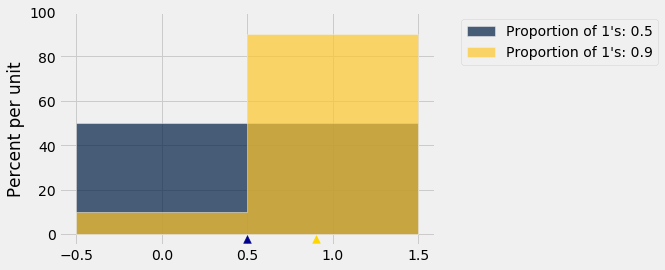

In [2]:
pop_50 = make_array(1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
pop_90 = make_array(1, 1, 1, 1, 1, 1, 1, 1, 1, 0)

coins = Table().with_columns(
   "Proportion of 1's: 0.5", pop_50,
   "Proportion of 1's: 0.9", pop_90,
)
coins.hist(bins=np.arange(-0.5, 1.6, 1))
plots.scatter(0.5, -0.02, marker='^', color='darkblue', s=60)
plots.scatter(0.9, -0.02, marker='^', color='gold', s=60)
plots.ylim(-0.05, 1);

Rappelez-vous que les valeurs possibles dans la population sont uniquement 0 et 1.

L'histogramme bleu (50 % de 1 et 50 % de 0) est plus étendu que l'histogramme doré. La moyenne est de 0,5. La moitié des écarts par rapport à la moyenne est égale à 0,5 et l'autre moitié est égale à -0,5, de sorte que l'écart-type est de 0,5.

Dans l'histogramme de l'or, toute la surface est écrasée autour de 1, ce qui réduit l'écart. 90 % des écarts sont faibles : 0,1. Les 10 % restants sont de -0,9, ce qui est important, mais dans l'ensemble, l'écart est plus faible que dans l'histogramme bleu.

La même observation s'appliquerait si nous faisions varier la proportion de 1 ou si nous laissions la proportion de 0 être plus grande que la proportion de 1. Vérifions cela en calculant les écarts types de populations de 10 éléments composées uniquement de 0 et de 1, dans des proportions variables. La fonction `np.ones` est utile pour cela. Elle prend un entier positif comme argument et renvoie un tableau composé d'autant de 1.

In [3]:
sd = make_array()
for i in np.arange(1, 10, 1):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i), 1-np.ones(10-i))
    sd = np.append(sd, np.std(population))
    
zero_one_sds = Table().with_columns(
    "Population Proportion of 1's", np.arange(0.1, 1, 0.1),
    "Population SD", sd
)

zero_one_sds

Population Proportion of 1's,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


Il n'est pas surprenant que l'écart-type d'une population comportant 10 % de 1 et 90 % de 0 soit le même que celui d'une population comportant 90 % de 1 et 10 % de 0. Cela s'explique par le fait que l'on intervertit les barres d'un histogramme pour obtenir l'autre ; il n'y a pas de changement dans la dispersion.

Plus important pour notre propos, l'écart-type augmente à mesure que la proportion de 1 augmente, jusqu'à ce que la proportion de 1 soit de 0,5 ; ensuite, il commence à diminuer symétriquement.

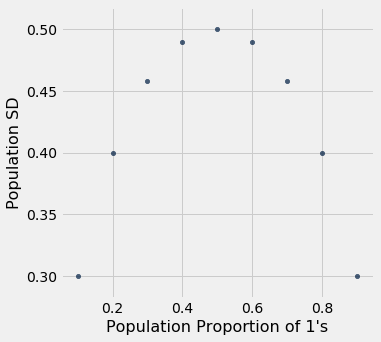

In [4]:
zero_one_sds.scatter("Population Proportion of 1's")

**Résumé:** L'écart-type d'une population composée de 1 et de 0 est au maximum de 0,5. C'est la valeur de l'écart-type lorsque 50 % de la population est codée 1 et que les 50 % restants sont codés 0.

#### La taille de l'échantillon
Nous savons que

$$
\sqrt{\mbox{taille de l'échantillon}} ~ \ge ~ 4 \times \frac{\mbox{SD de la population 0-1}}{0.01}
$$

et que l'écart-type de la population 0-1 est au maximum de 0,5, quelle que soit la proportion de 1 dans la population. Il est donc prudent de prendre

$$
\sqrt{\mbox{taille de l'échantillon}} ~ \ge ~ 4 \times \frac{0.5}{0.01} ~=~ 200
$$

La taille de l'échantillon doit donc être d'au moins $200^2 = 40 000$. C'est un échantillon énorme ! Mais c'est ce qu'il faut si l'on veut garantir une grande précision avec un niveau de confiance élevé, quelle que soit la nature de la population.

# Crédits

Ce cours est inspiré du cours data8 donné à UC Berkeley et en ré-utilise avec certaines modifications une partie des matériels (ces matériels sont généreusement mis à disposition publiquement sous licence Creative Commons avec attribution, consultez [https://www.data8.org](https://www.data8.org) pour plus d'informations.